#Pr√©diction du Risque de Maladie Cardiovasculaire

1. **Objectif** :

Ce projet de machine learning vise √† **pr√©dire la probabilit√© qu‚Äôun patient pr√©sente une maladie cardiovasculaire**. La variable cible est binaire : `1` indique la pr√©sence, et `0` une absence de maladie cardiovasculaire identifi√©e.

Ce projet s‚Äôinscrit donc dans une logique de m√©decine pr√©dictive, afin d‚Äôaider √† :

  - Identifier les patients √† haut risque,
  - Adapter les interventions m√©dicales (suivi, traitements, hygi√®ne de vie),
  - R√©duire les hospitalisations et les co√ªts de sant√© publique.

2. **M√©thodologie envisag√©e** :

  - Nettoyage et pr√©paration des donn√©es
  - Analyse exploratoire des variables (univari√©, bibari√©e et multivari√©e)
  - Mod√©lisation par **r√©gression logistique**
  - √âvaluation via l‚Äô**AUC**, **pr√©cision**, **rappel**, et **matrice de confusion**
  - Analyse des coefficients pour comprendre les facteurs de risque

3.  Hypoth√®ses de la regr√©ssion Logistique :
  - **variable cible binaire**
  - **lin√©arit√©** entre les variables num√©riques et **le logit de la variable cible**
  - **abscence de la multicolin√©arit√© au sein des variables num√©riques**
  - **pr√©cision dans la m√©sure des variables num√©riques** (erreurs n√©gligeable)
  - **nombre suffisant d'observations** (grand jeu de donn√©es)


In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
# les modules utilis√©s
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des donn√©es

In [96]:
data = pd.read_csv("/content/cardio_data.csv")

In [97]:
data.head(3)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   

   alco  active  cardio  age_years        bmi           bp_category  \
0     0       1       0         50  21.967120  Hypertension Stage 1   
1     0       1       1         55  34.927679  Hypertension Stage 2   
2     0       0       1         51  23.507805  Hypertension Stage 1   

    bp_category_encoded  
0  Hypertension Stage 1  
1  Hypertension Stage 2  
2  Hypertension Stage 1

**Description des varaiables** :

1. **id** : identifiant unique du patient
2. **age** : √¢ge du patient en jours
3. **gender** : sexe, 1 = femme, 2 = homme
4. **height** : taille du patient en centim√®tres
5. **weight** : poids (masse) en kilogrammes
6. **ap_hi** : pression art√©rielle systolique maximale en milim√®tre de Mercure (mmHg)
7. **ap_lo** : pression art√©rielle diastolique minimale en mmHg
8. **cholesterol** : taux de cholest√©rol (1 = normal, 2 = √©lev√©, 3 = tr√®s √©lev√©)
9. **gluc** : taux de glucose (1 = normal, 2 = √©lev√©, 3 = tr√®s √©lev√©)
10. **smoke** : patient actuellement fumeur (1 = oui et 0 = non)
11. **alco** : consommation d'alcool (1 = oui et 0 = non)
12. **active** : pratique d'activit√© physique r√©guli√®re (1 = oui et 0 = non)
13. **cardio** (variable cible) : pr√©sence (1) ou abscence (0) d'une maladie caridovasculaire
14. **age_years** : √¢ge du patient en ann√©es
15. **bmi** indice de masse corporelle (poids / taille¬≤, poids en kg et la taille en m√®tre)
16. **bp_category** : cat√©gorie de la pression art√©rielle (parmi "Normal", "Elevated", "Hypertension Stage 1" et "Hypertension Stage 2")
17. **bp_category_encoded** : Version encod√©e num√©rique de la cat√©gorie pr√©c√©dente

In [98]:
# suppresion des variables r√©dondantes : id, age (en jours) et bp_category
data = data.drop(["id", "age", "bp_category"], axis = 1)

In [99]:
data.head(2)

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0       2     168    62.0    110     80            1     1      0     0   
1       1     156    85.0    140     90            3     1      0     0   

   active  cardio  age_years        bmi   bp_category_encoded  
0       1       0         50  21.967120  Hypertension Stage 1  
1       1       1         55  34.927679  Hypertension Stage 2

In [100]:
# Renommage des variables
data.columns = ["sexe", "taille", "poids", "press_systolique", "press_diastolique", "cholesterol", "glucose", "fumeur","alcool", "sport", "target", "age", "imc", "press_arterielle"]

In [101]:
data.head()

sexe  taille  poids  press_systolique  press_diastolique  cholesterol  \
0     2     168   62.0               110                 80            1   
1     1     156   85.0               140                 90            3   
2     1     165   64.0               130                 70            3   
3     2     169   82.0               150                100            1   
4     1     156   56.0               100                 60            1   

   glucose  fumeur  alcool  sport  target  age        imc  \
0        1       0       0      1       0   50  21.967120   
1        1       0       0      1       1   55  34.927679   
2        1       0       0      0       1   51  23.507805   
3        1       0       0      1       1   48  28.710479   
4        1       0       0      0       0   47  23.011177   

       press_arterielle  
0  Hypertension Stage 1  
1  Hypertension Stage 2  
2  Hypertension Stage 1  
3  Hypertension Stage 2  
4                Normal

In [102]:
# Encodage du sexe (ordre alphab√©tique : 0 = femme et 1 = homme)
data["sexe"] = data["sexe"].replace({1 : 0, 2 : 1}).astype("int")
data["sexe"] = pd.Categorical(data["sexe"], categories = [0, 1], ordered = True)

In [103]:
# Encodage de la pression art√©rielle en variable discr√®te oridinale
data["press_arterielle"] = data["press_arterielle"].replace({"Normal" : 1, "Elevated" : 2, "Hypertension Stage 1" : 3, "Hypertension Stage 2" : 4}).astype("int")
data["press_arterielle"] = pd.Categorical(data["press_arterielle"], categories = [1, 2, 3, 4], ordered = True)

In [104]:
# d√©finir l'ordre dans les variables cat√©gorielles
data["cholesterol"] = pd.Categorical(data["cholesterol"], categories = [1, 2, 3], ordered = True)
data["glucose"] = pd.Categorical(data["glucose"], categories = [1, 2, 3], ordered = True)
data["fumeur"] = pd.Categorical(data["fumeur"], categories = [0, 1], ordered = True)
data["alcool"] = pd.Categorical(data["alcool"], categories = [0, 1], ordered = True)
data["sport"] = pd.Categorical(data["sport"], categories = [0, 1], ordered = True)
data["target"] = pd.Categorical(data["target"], categories = [0, 1], ordered = True)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sexe               68205 non-null  category
 1   taille             68205 non-null  int64   
 2   poids              68205 non-null  float64 
 3   press_systolique   68205 non-null  int64   
 4   press_diastolique  68205 non-null  int64   
 5   cholesterol        68205 non-null  category
 6   glucose            68205 non-null  category
 7   fumeur             68205 non-null  category
 8   alcool             68205 non-null  category
 9   sport              68205 non-null  category
 10  target             68205 non-null  category
 11  age                68205 non-null  int64   
 12  imc                68205 non-null  float64 
 13  press_arterielle   68205 non-null  category
dtypes: category(8), float64(2), int64(4)
memory usage: 3.6 MB


# Les donn√©es manquantes

In [106]:
data.isna().sum()

sexe                 0
taille               0
poids                0
press_systolique     0
press_diastolique    0
cholesterol          0
glucose              0
fumeur               0
alcool               0
sport                0
target               0
age                  0
imc                  0
press_arterielle     0
dtype: int64

Aucune donn√©e manquante.

# Analyse univari√©e

## La variable cible (target)

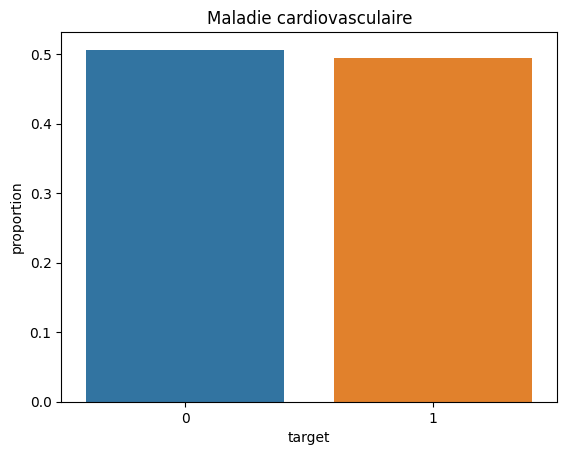

In [107]:
# visualisation
sns.countplot(x = 'target', data = data, hue = 'target', stat = "proportion",legend = False)
plt.title("Maladie cardiovasculaire")
plt.show()

Les deux classes sont √©quilibr√©es,il y'a donc presqu'autant de patients diagnostiqu√©s d'une maladie cardiovasculaire et que ceux ne l'ayant pas √©t√©.

De plus, il ne sera donc pas utile de mettre en place des m√©thodes de r√©-√©chantillonnage comme l'**Oversampling** qui sert √† √©quilibrer les classes dans le but de r√©duire la tendance du mod√®le √† mieux pr√©dire la classe majoritaire.

## Les variables qualitatives

In [108]:
cat_var = data[["sexe", "cholesterol", "glucose", "fumeur", "alcool", "sport", "press_arterielle"]]
cat_var = cat_var.copy()

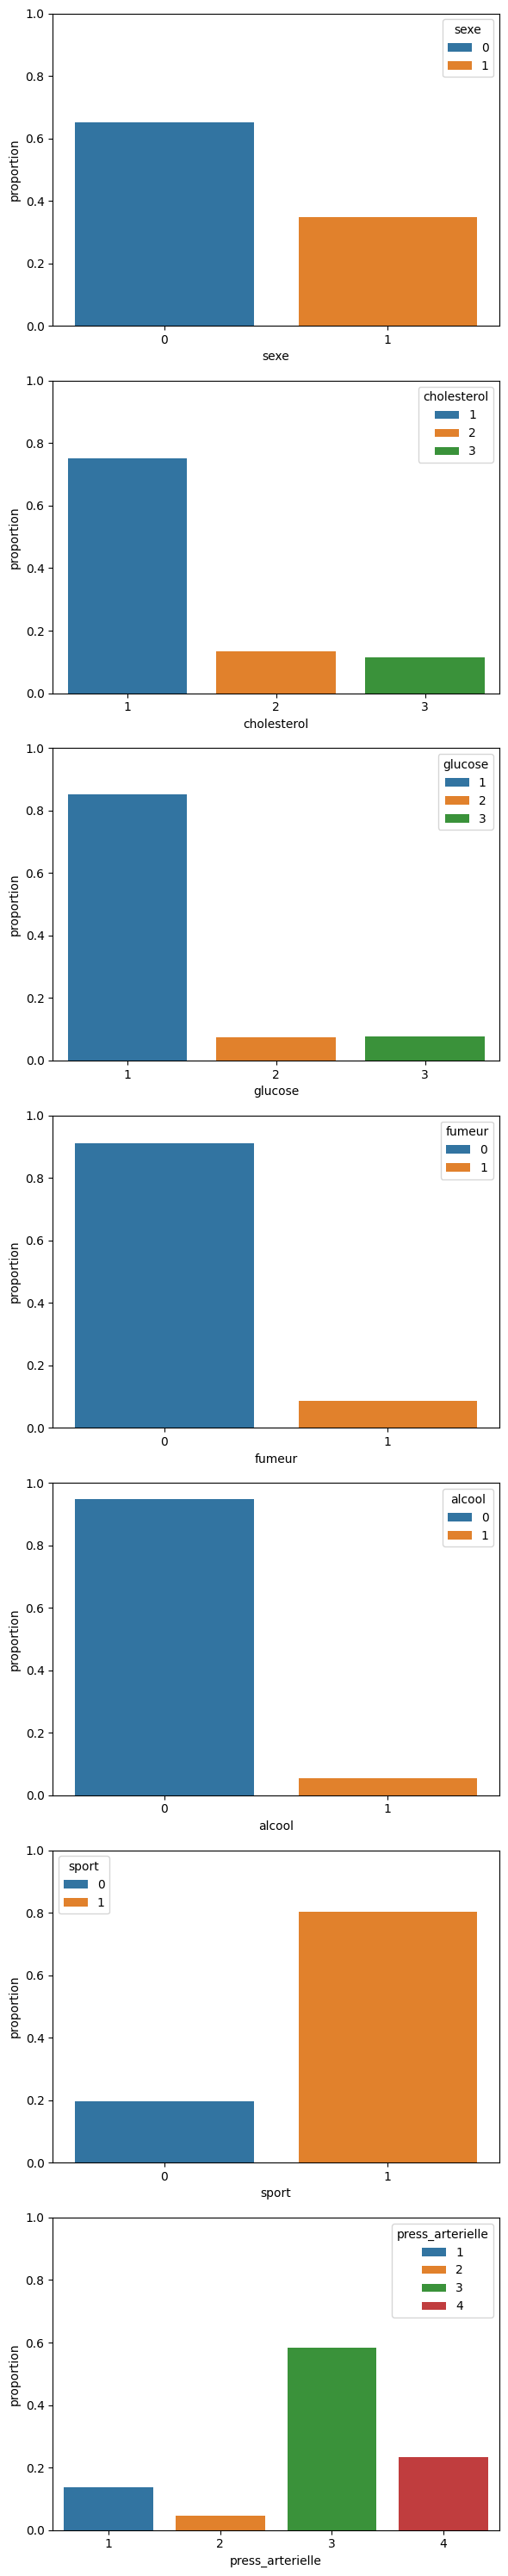

In [109]:
fig, axes = plt.subplots(cat_var.shape[1], 1, figsize = (6, 30))
i = 0
for var in cat_var.columns:
  sns.countplot(x = var, data = cat_var, hue = var, stat = "proportion", ax = axes[i])
  axes[i].set_ylim(0, 1.0)
  i = i + 1
plt.tight_layout()
plt.show()

On peut remarquer qu'au moins **2/3** des patients sont des **femmes**, et que la **grande majorit√© des patients** sont **non-fumeur**, **ne consomment pas d'alcool**, ont des **taux normaux** de **cholest√©rol**, de **glucose** et **pratique** une **activit√© pphysique** r√©guli√®re.

Toutefois, **plus de la moiti√©** des patients sont en **stade 1 de l'hypertension** (pression art√©rielle).

## Les variables num√©riques (quantitatives)

In [110]:
num_var = data[["taille", "poids", "press_systolique", "press_diastolique", "age", "imc"]]
num_var = num_var.copy()

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sexe               68205 non-null  category
 1   taille             68205 non-null  int64   
 2   poids              68205 non-null  float64 
 3   press_systolique   68205 non-null  int64   
 4   press_diastolique  68205 non-null  int64   
 5   cholesterol        68205 non-null  category
 6   glucose            68205 non-null  category
 7   fumeur             68205 non-null  category
 8   alcool             68205 non-null  category
 9   sport              68205 non-null  category
 10  target             68205 non-null  category
 11  age                68205 non-null  int64   
 12  imc                68205 non-null  float64 
 13  press_arterielle   68205 non-null  category
dtypes: category(8), float64(2), int64(4)
memory usage: 3.6 MB


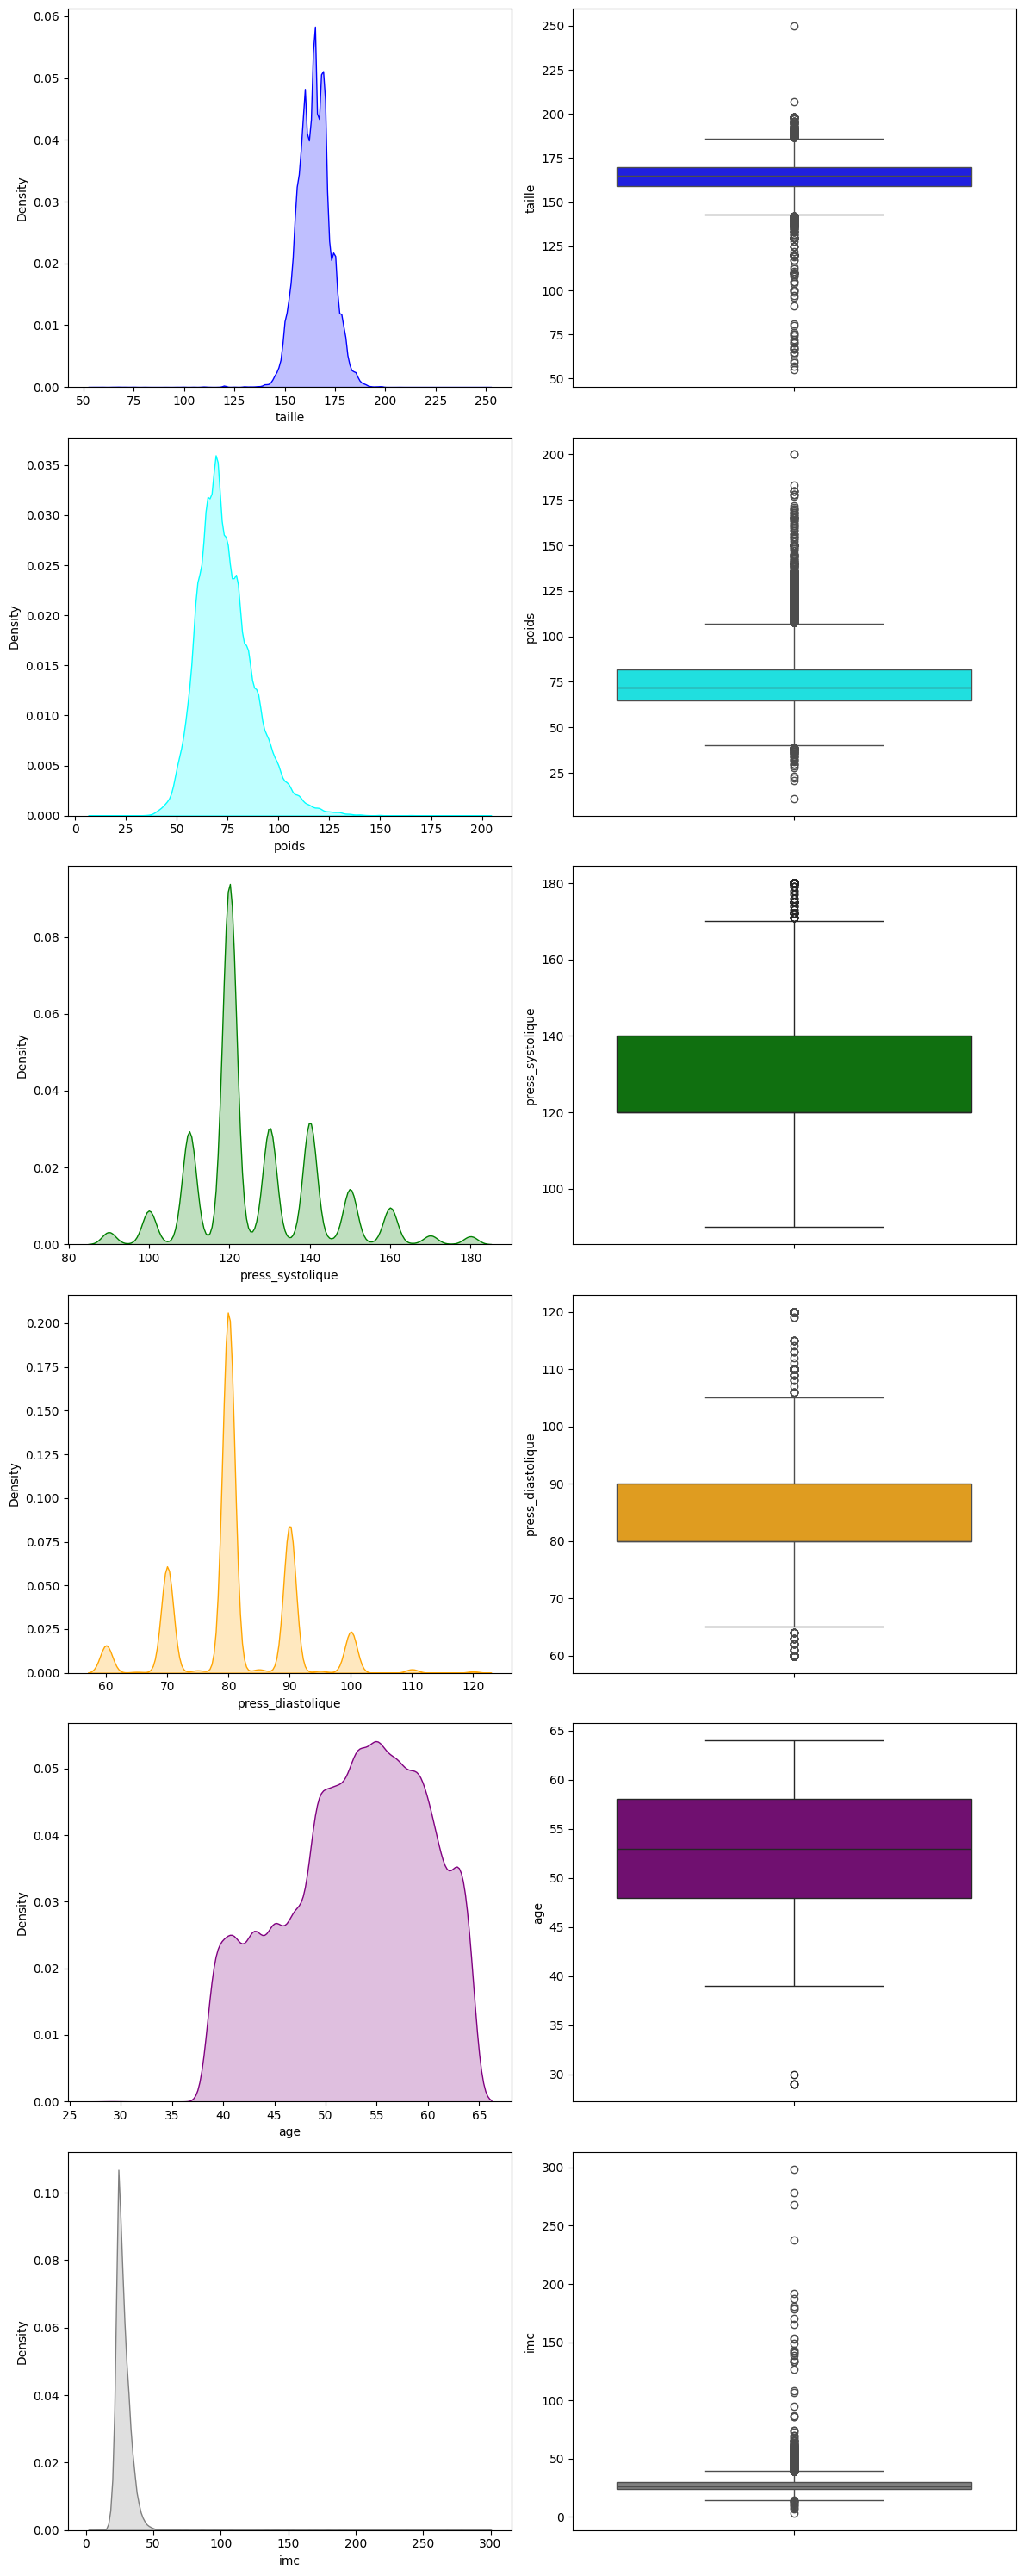

In [112]:
fig, axes = plt.subplots(num_var.shape[1], 2, figsize = (12, 30))
i = 0
colors = ["blue", "cyan", "green", "orange", "purple", "gray"]
for var in num_var.columns:
  sns.kdeplot(x = var, data = num_var, fill = True, color = colors[i], ax = axes[i, 0])
  sns.boxplot(y = var, data = num_var, color = colors[i], ax = axes[i, 1])
  i = i + 1
plt.tight_layout()
plt.show()

In [113]:
num_var.describe()

taille         poids  press_systolique  press_diastolique  \
count  68205.000000  68205.000000      68205.000000       68205.000000   
mean     164.372861     74.100688        126.434924          81.263925   
std        8.176756     14.288862         15.961685           9.143985   
min       55.000000     11.000000         90.000000          60.000000   
25%      159.000000     65.000000        120.000000          80.000000   
50%      165.000000     72.000000        120.000000          80.000000   
75%      170.000000     82.000000        140.000000          90.000000   
max      250.000000    200.000000        180.000000         120.000000   

                age           imc  
count  68205.000000  68205.000000  
mean      52.823635     27.510513  
std        6.769909      6.026497  
min       29.000000      3.471784  
25%       48.000000     23.875115  
50%       53.000000     26.346494  
75%       58.000000     30.116213  
max       64.000000    298.666667

#### Interpr√©tation :

- **Taille** : distribution centr√©e autour de 165 cm, mais pr√©sence de valeurs extr√™mes (`min = 55 cm`, `max = 250 cm`) peu plausibles pour des adultes. Probables erreurs de saisie √† filtrer ou corriger.

- **Poids** : valeurs majoritairement coh√©rentes, **mais `11 kg` en minimum est biologiquement invraisemblable*** pour un adulte. √Ä exclure ou corriger.

- **Pression systolique** : distribution dans une plage r√©aliste (90 √† 180 mmHg), bien que probablement asym√©trique vers la droite. Valeurs √©lev√©es possibles en cas d‚Äôhypertension avanc√©e, mais pas aberrantes.

- **Pression diastolique** : intervalle de 60 √† 120 mmHg, plausible cliniquement. Peut indiquer des cas d‚Äôhypertension mod√©r√©e √† s√©v√®re, sans signe √©vident d‚Äôerreur de saisie.

- **√Çge** : distribution homog√®ne entre 29 et 64 ans, conforme √† une population adulte en suivi cardiovasculaire. Aucune valeur aberrante d√©tect√©e.

- **IMC** : distribution typique centr√©e autour de 27, mais pr√©sence d‚Äôun extr√™me (`IMC = 298`) totalement irr√©aliste. Erreur manifeste, souvent li√©e √† un mauvais calcul (taille en cm au lieu de m par exemple). On va donc recalculer l'**IMC** puisque l'on dispose des variables poids et taille que l'on ram√®nera aux √©chelles convenables (m√®tre et kilogramme).

## Gestion des valeurs aberrantes

#### 1. La taille :
pour un adulte les valeurs en dessous d'1m50 sont tr√®s peu probable, ainsi la m√©thode choisi sera de remplacer la taille des tous les patients en dessous du seuil 1m59 par la valeur du premier quartile (qui est 1m59 soit 159 cm) et tous individus ayant plus de 2m par la valeur 2m

In [114]:
num_var.loc[data["taille"] < 159, "taille"] = 159
num_var.loc[data["taille"] > 200, "taille"] = 200

In [115]:
num_var["taille"].describe()

count    68205.000000
mean       165.534301
std          6.343489
min        159.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        200.000000
Name: taille, dtype: float64

#### 2. Le poids des patients:
Un poids en dessous de **50 kg** pour un adulte d'en **moyenne 1m59 √† 1m60** donc un indice de masse corporelle **(IMC)** de **18.3** qui est une insuffisance pond√©rale tr√®s l√©g√®re (d'apr√®s l'OMS) puisque la corpulance normale est entre 18.5 et 24.9 d'IMC

In [116]:
# statistiques des patients de moins de 50 kg
num_var[num_var["poids"] < 50].describe()

taille       poids  press_systolique  press_diastolique  \
count  954.000000  954.000000        954.000000         954.000000   
mean   160.142558   45.360220        116.128931          75.485325   
std      2.819251    3.842007         16.769881           9.825460   
min    159.000000   11.000000         90.000000          60.000000   
25%    159.000000   44.000000        100.750000          70.000000   
50%    159.000000   46.000000        120.000000          80.000000   
75%    159.000000   48.000000        120.000000          80.000000   
max    178.000000   49.000000        180.000000         120.000000   

              age         imc  
count  954.000000  954.000000  
mean    51.681342   19.008593  
std      7.359822    2.116235  
min     39.000000    3.471784  
25%     45.000000   17.799929  
50%     52.000000   19.044321  
75%     58.000000   20.395421  
max     64.000000   31.360000

In [117]:
# remplacement des valeurs de poids en dessous de 50kg par un poids de 50kg
num_var.loc[num_var["poids"] < 50, "poids"] = 50

In [118]:
# les patients de plus de 170 kg
num_var[num_var["poids"] > 170].describe()

taille       poids  press_systolique  press_diastolique        age  \
count   13.000000   13.000000         13.000000          13.000000  13.000000   
mean   176.384615  181.307692        130.000000          83.076923  48.769231   
std     10.642200    8.910524         11.547005           8.548504   6.098550   
min    159.000000  171.000000        110.000000          70.000000  41.000000   
25%    169.000000  178.000000        120.000000          80.000000  45.000000   
50%    177.000000  180.000000        130.000000          80.000000  47.000000   
75%    180.000000  180.000000        140.000000          90.000000  52.000000   
max    196.000000  200.000000        150.000000         100.000000  59.000000   

              imc  
count   13.000000  
mean    74.705995  
std     61.343997  
min     46.855477  
25%     56.481481  
50%     58.109504  
75%     61.728395  
max    278.125000

Les patients de plus de 170 kg mesurent **en moyenne plus 1m76**, alors les valeurs de poids > 170 kg sont coh√©rentes sur le plan clinique, m√™me si elles restent extr√™mes. On va donc conserver ces valeurs de poids

#### 3. √Çge, pressions Systolique et Diastolique:

In [119]:
num_var[["age", "press_systolique", "press_diastolique"]].describe()

age  press_systolique  press_diastolique
count  68205.000000      68205.000000       68205.000000
mean      52.823635        126.434924          81.263925
std        6.769909         15.961685           9.143985
min       29.000000         90.000000          60.000000
25%       48.000000        120.000000          80.000000
50%       53.000000        120.000000          80.000000
75%       58.000000        140.000000          90.000000
max       64.000000        180.000000         120.000000

L'**√¢ge** et les **pressions art√©rielles systolique et diastolique** prennent des valeurs plausibles sur le plan clinique.

**Analyse des pressions art√©rielles** :

Voici une correspondance claire entre tes **modalit√©s ordinales (1 √† 4)** et les seuils de **pression art√©rielle systolique**, selon les recommandations internationales (*ACC/AHA 2017*, *OMS*) :

| **Modalit√©** | **Cat√©gorie clinique**        | **Pression systolique (mmHg)** |
|--------------|-------------------------------|-------------------------------|
| 1            | Normale                       | < 120                         |
| 2            | √âlev√©e (*Elevated*)           | 120 ‚Äì 129                     |
| 3            | Hypertension Stade 1          | 130 ‚Äì 139                     |
| 4            | Hypertension Stade 2          | ‚â• 140
                        
**Avec nos donn√©es** :
1. Pression systolique (max : 180 mmHg, min : 90 mmHg)
  - La moyenne de 126 mmHg se situe juste au-dessus de la normale (< 120 mmHg), ce qui est logique dans un groupe des patients √† risque cardiovasculaire.
  - 25% des patients d√©passent d√©j√† 140 mmHg, seuil de l‚Äôhypertension stade 2.
  - La valeur maximale de 180 mmHg repr√©sente une hypertension s√©v√®re, mais reste plausible sur le plan clinique.
---

les seuils de **pression art√©rielle diastolique**:

| **Modalit√©** | **Cat√©gorie clinique**        | **Pression diastolique (mmHg)** |
|--------------|-------------------------------|-------------------------------|
| 1            | Normale                       | < 80                         |
| 2            | √âlev√©e (*Elevated*)           | 80 ‚Äì 89                     |
| 3            | Hypertension Stade 1          | 90 ‚Äì 99                     |
| 4            | Hypertension Stade 2          | ‚â• 100


**Interpr√©tation des donn√©es**:

2. Pression diastolique :
  - Min : 60 mmHg
  - Max : 120 mmHg
  - Moyenne : 81 mmHg

Ces valeurs couvrent une plage cliniquement plausible, bien que la distribution semble asym√©trique vers les valeurs √©lev√©es.
  - 60 mmHg correspond √† une pression diastolique basse mais encore dans les limites normales.
  - 80 mmHg (m√©diane) est le seuil sup√©rieur de la normalit√© selon les recommandations internationales.
  - ‚â• 90 mmHg indique une hypertension diastolique (stade 1), et 120 mmHg peut signaler une hypertension s√©v√®re, voire une urgence hypertensive ‚Äî rare mais possible dans une population √† risque.


#### 4. l'Indice de Masse Corporelle (IMC):
On va recalculer cette variable √† l'aide de la formule suivante:
$
\text{IMC} = \frac{\text{Poids (kg)}}{[\text{Taille (m)}]^2}
$

In [120]:
num_var["imc"] = num_var["poids"] / ((num_var["taille"] / 100)**2)

In [121]:
num_var["imc"].describe()

count    68205.000000
mean        27.065193
std          4.985268
min         14.577259
25%         23.711845
50%         26.026175
75%         29.687500
max         70.408607
Name: imc, dtype: float64

üìä Classification de l‚ÄôIMC (kg/m¬≤)

| **Cat√©gorie**                      | **Valeur de l‚ÄôIMC**   |
|------------------------------------|------------------------|
| Insuffisance pond√©rale s√©v√®re      | < 16,5                 |
| Insuffisance pond√©rale mod√©r√©e     | 16,0 ‚Äì 16,9            |
| Insuffisance pond√©rale l√©g√®re      | 17,0 ‚Äì 18,49           |
| Corpulence normale                 | 18,5 ‚Äì 24,9            |
| Surpoids                           | 25,0 ‚Äì 29,9            |
| Ob√©sit√© mod√©r√©e (Classe I)         | 30,0 ‚Äì 34,9            |
| Ob√©sit√© s√©v√®re (Classe II)         | 35,0 ‚Äì 39,9            |
| Ob√©sit√© morbide (Classe III)       | ‚â• 40,0                 |

- Moyenne : 27,07 ‚Üí Cela confirme une population majoritairement en surpoids l√©ger, selon la classification de l‚ÄôOMS.
- √âcart-type : 4,99 ‚Üí Une variabilit√© mod√©r√©e, ce qui refl√®te une diversit√© de corpulences sans extr√™mes massifs.
- M√©diane : 26,03 ‚Üí Tr√®s proche de la moyenne, ce qui indique une distribution relativement sym√©trique.
- 1er quartile (Q1) : 23,71 / 3e quartile (Q3) : 29,69 ‚Üí 50 % des patients ont un IMC dans la plage poids normal ‚Üî surpoids avanc√©, soit une corpulence globalement mod√©r√©e.
- Minimum : 14,58 ‚Üí Cela signale des cas d‚Äôinsuffisance pond√©rale s√©v√®re, rares mais biologiquement plausibles.
- Maximum : 70,41 ‚Üí IMC tr√®s √©lev√©, correspondant √† de l‚Äôob√©sit√© morbide classe III ; plausible sur le plan m√©dical, mais m√©rite v√©rification du calcul chez les individus concern√©s.

In [122]:
# statistiques des individus avec un IMC >= 40 (ob√©sit√© morbide)
num_var[num_var["imc"] >= 40].describe()

taille        poids  press_systolique  press_diastolique  \
count  1290.000000  1290.000000       1290.000000        1290.000000   
mean    163.276744   118.176589        137.201550          86.465891   
std       5.591901    14.776079         17.895516          10.049490   
min     159.000000   102.000000         90.000000          60.000000   
25%     159.000000   108.000000        120.000000          80.000000   
50%     161.000000   114.000000        140.000000          90.000000   
75%     165.000000   125.000000        150.000000          90.000000   
max     196.000000   200.000000        180.000000         120.000000   

               age          imc  
count  1290.000000  1290.000000  
mean     53.293798    44.274341  
std       6.611440     4.523722  
min      39.000000    40.009145  
25%      49.000000    41.270077  
50%      54.000000    42.767884  
75%      59.000000    45.720146  
max      64.000000    70.408607

Les personnes en ob√©sit√© morbide ont en moyenne une taille 1m60 et un poids moyen de 110kg. les donn√©es sont donc coh√©rentes.

#### visualisation des variables num√©riques modifi√©es

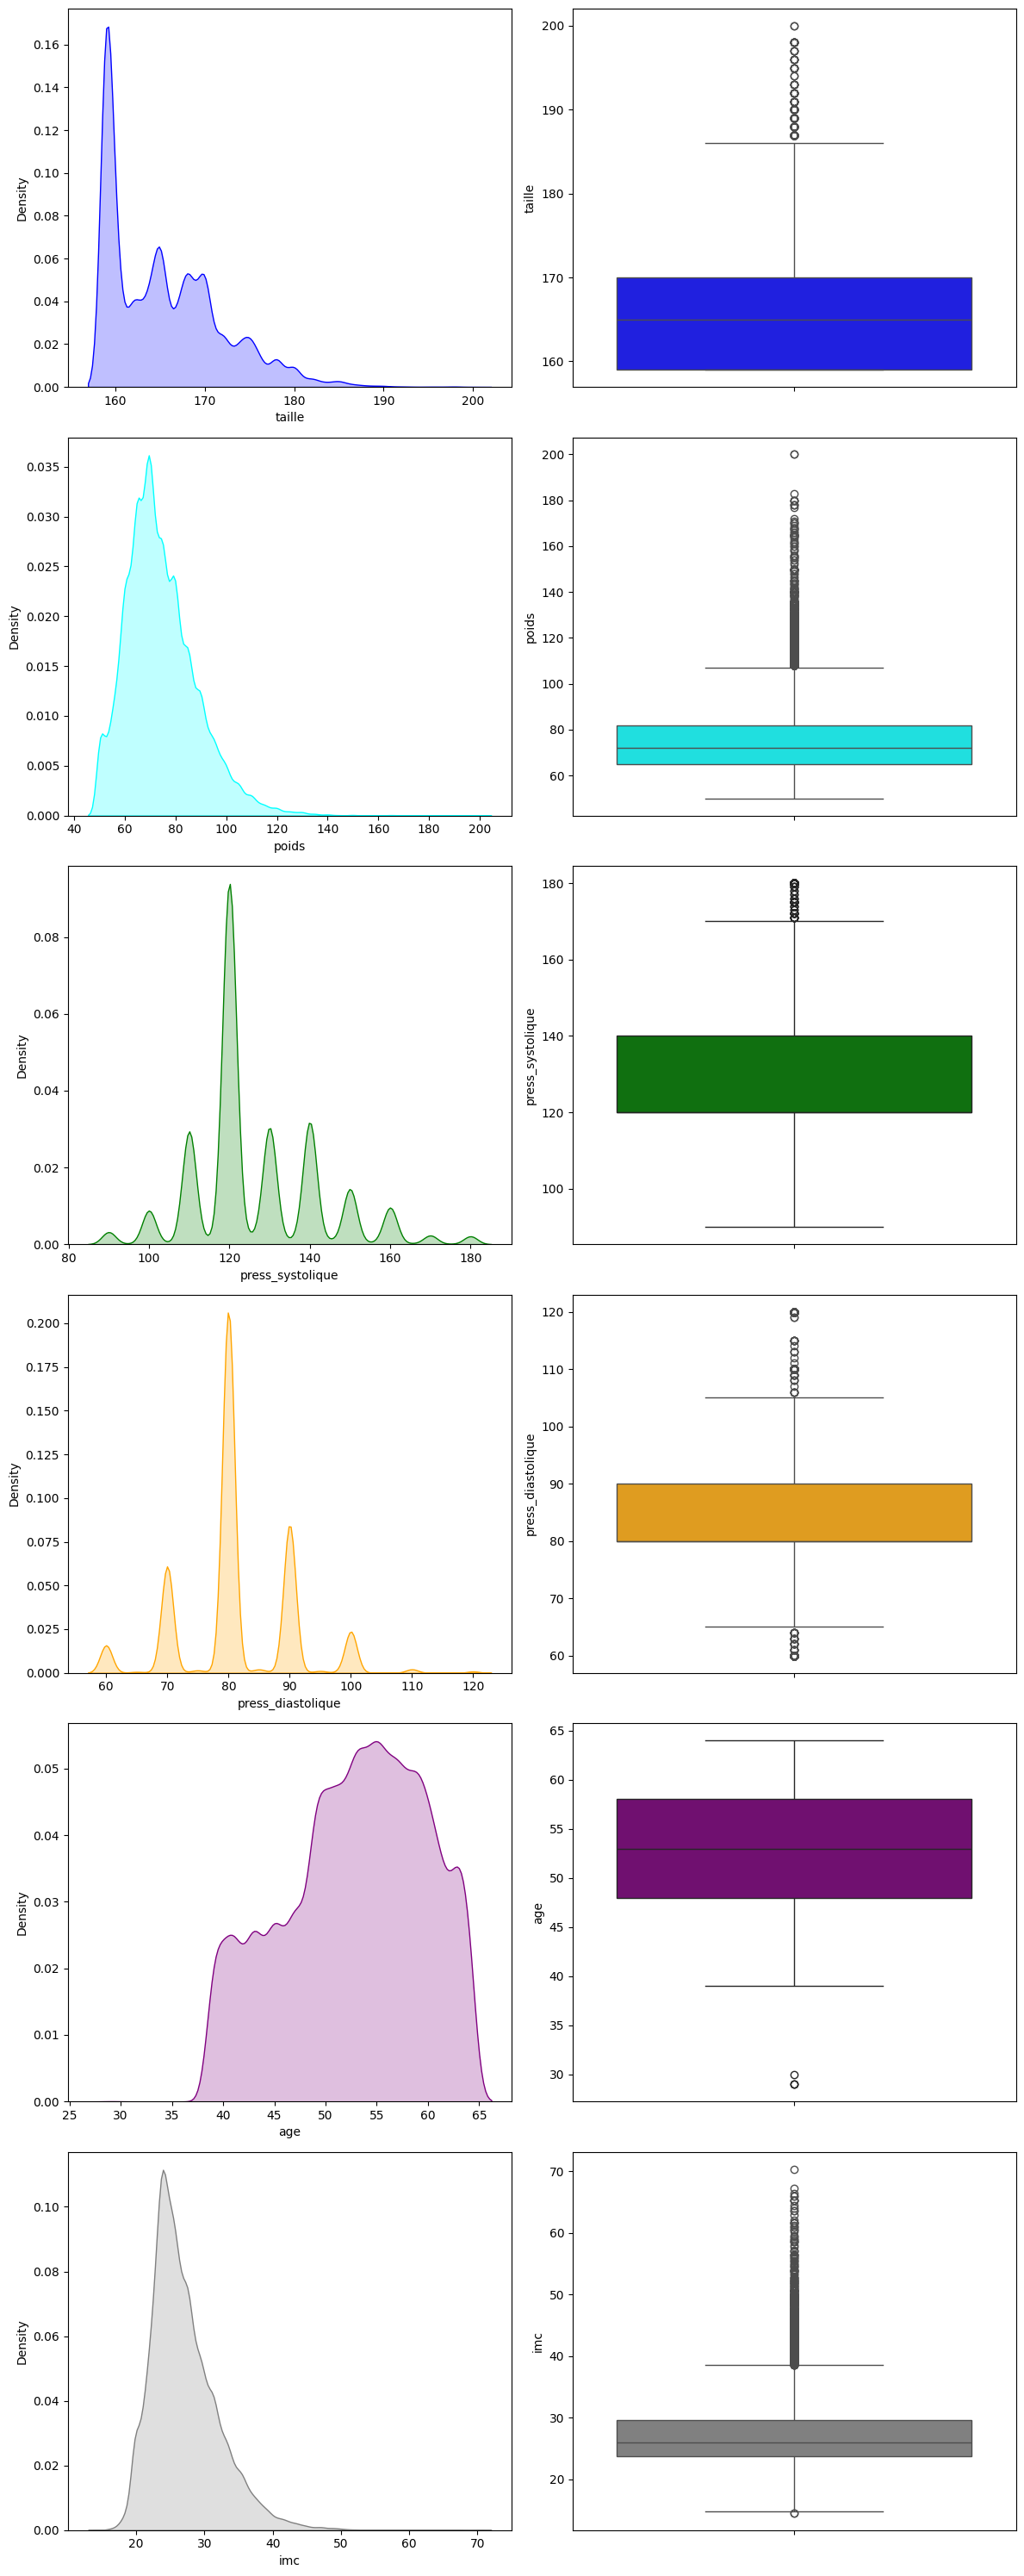

In [123]:
fig, axes = plt.subplots(num_var.shape[1], 2, figsize = (12, 30))
i = 0
colors = ["blue", "cyan", "green", "orange", "purple", "gray"]
for var in num_var.columns:
  sns.kdeplot(x = var, data = num_var, fill = True, color = colors[i], ax = axes[i, 0])
  sns.boxplot(y = var, data = num_var, color = colors[i], ax = axes[i, 1])
  i = i + 1
plt.tight_layout()
plt.show()

# Analyse bivari√©e

## 1. Variables cat√©gorielles avec la cible

In [124]:
cat_var["target"] = data["target"]

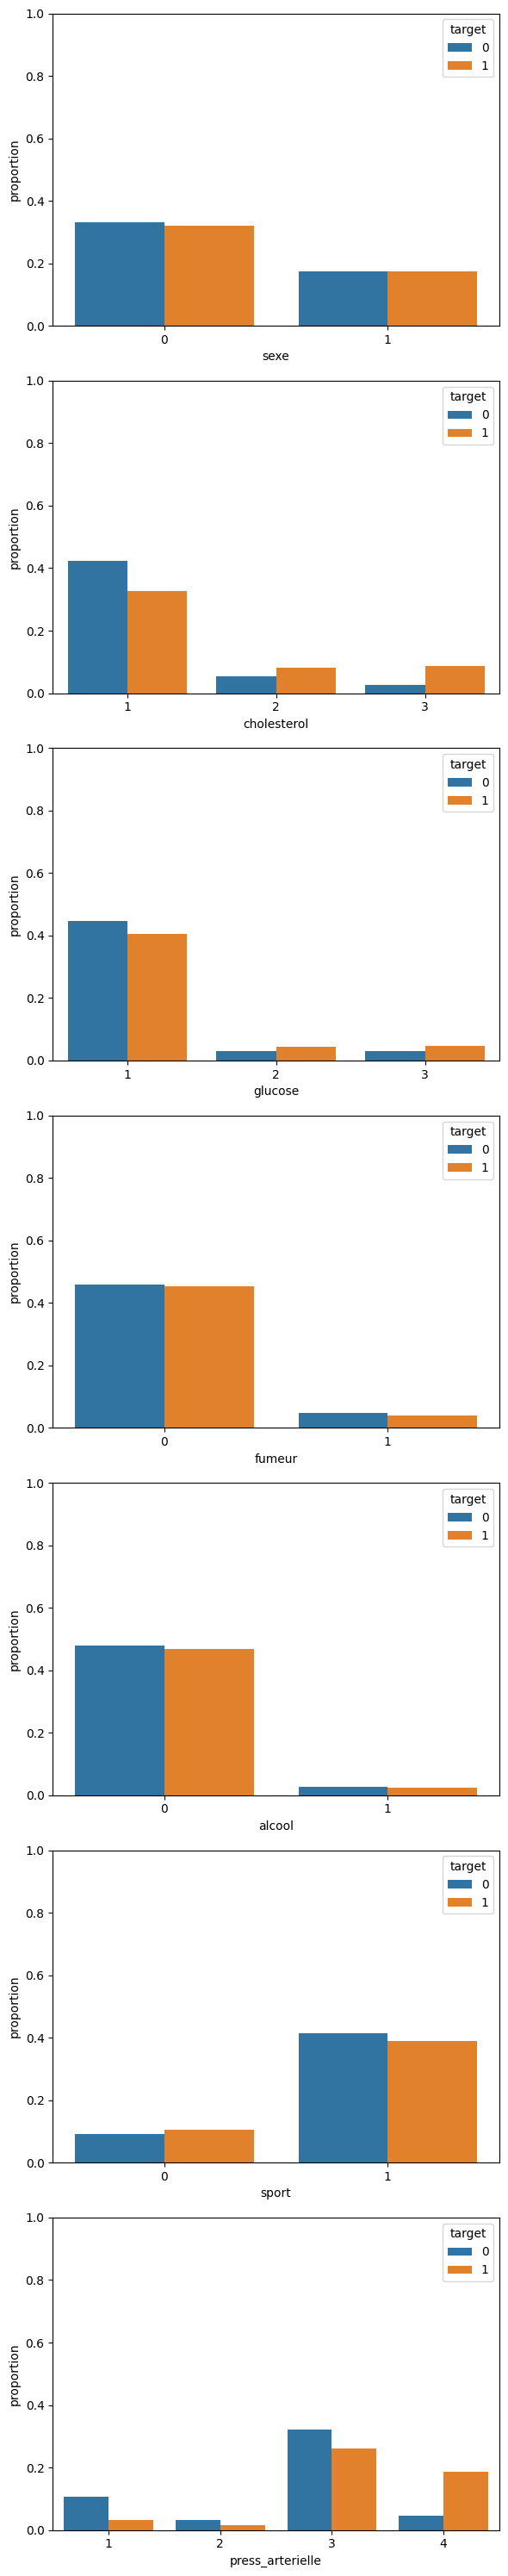

In [125]:
fig, axes = plt.subplots(cat_var.shape[1] - 1, 1, figsize = (6, 30))
i = 0
var_list = list(cat_var.columns)
var_list.remove("target")
for var in var_list:
  sns.countplot(x = var, data = cat_var, hue = "target", stat = "proportion", ax = axes[i])
  axes[i].set_ylim(0, 1.0)
  i = i + 1
plt.tight_layout()
plt.show()

Visuellement on peut observer **l'influence ou la liaison des variables explicatives sur la  cible** par le d√©s√©quilibre des personnes malades au sein de chaque classe de la variable cat√©gorielle explicative d'int√©r√™t.

Le cas des malades qui sont **majoritairement non-fumeur** compar√© aux **fumeurs** ou m√™me qu'il y'a plus **des maladies cardiovasculaires** chez les patients ayant un **taux normal de glucose** (modalit√© 1).

Toutefois, un **graphique bivari√©** peut refl√©ter **un d√©s√©quilibre** qui vient soit de la **variable cible** (target), soit de la **variable explicative**, **soit des deux**.

En effet, on a vu pr√©c√©demment lors de l'analyse univari√©e des variables qualitatives que **certaines variables avaient des classes fortement d√©s√©quilibr√©es**, notamment les non-fumeurs qui constitu√©s la quasi-totalit√© des patients ou m√™me que les patients au taux de glucose sanguin normal √©taient largement majoritaires.

Ainsi, **il se pourrait que le d√©s√©quilibre** des distributions de la variable cible au sein des classes de la variable **fumeur** ou m√™me **glucose** **provient du d√©s√©quilibre d√©j√† existant au sein des modalit√©s de ces variables**.

Finalement, nous mettrons en place des **tests de Chi-deux** pour voir si les variables sont ind√©pendantes au sens statistiques.


In [126]:
import scipy.stats as stats

In [127]:
def test_chi2(variables):
    result = {}
    for var1 in variables.columns:
        result[var1] = []
        for var2 in variables.columns:
          # √âviter de tester la variable avec elle-m√™me
            if var1 != var2:
                table_contingence = pd.crosstab(variables[var1], variables[var2])
                _, p_value, _, _ = stats.chi2_contingency(table_contingence)
                result[var1].append(round(p_value, 2))  # Arrondi √† 2 d√©cimales
            else:
                result[var1].append(None)
    # Transformer en DataFrame
    corr_df = pd.DataFrame(result, index=variables.columns)
    # true si il y'a association : p_valeur < 0.05(d√©pendance car on rejette H0)
    corr_df = corr_df < 0.05
    return corr_df

In [128]:
test_chi2(cat_var)

sexe  cholesterol  glucose  fumeur  alcool  sport  \
sexe              False         True     True    True    True  False   
cholesterol        True        False     True    True    True   True   
glucose            True         True    False    True    True   True   
fumeur             True         True     True   False    True   True   
alcool             True         True     True    True   False   True   
sport             False         True     True    True    True  False   
press_arterielle   True         True     True    True    True   True   
target            False         True     True    True    True   True   

                  press_arterielle  target  
sexe                          True   False  
cholesterol                   True    True  
glucose                       True    True  
fumeur                        True    True  
alcool                        True    True  
sport                         True    True  
press_arterielle             False    True  
target                        True   False

Hormis la variable sexe,  on voit que les liaisons deux √† deux entre la variable cible (target) et toutes les variables explicatives sont statistiquement significatives, comme l'inpression visuelle.

Il est aussi observable que les variables **cholesterol**, **glucose** et **fumeur** sont significativement li√©es. Nous allons √©valuer l'intensit√© de ce lien avec le **V de Cramer** qui est une version du co√©fficient de corr√©lation mais cette fois-ci pour le cas de deux varaiables qualitatives.

In [129]:
def cramers_v(variables):
    result = {}
    for var1 in variables.columns:
        result[var1] = []
        for var2 in variables.columns:
            if var1 != var2:
                # Table de contingence
                table_contingence = pd.crosstab(variables[var1], variables[var2])
                chi2, _, _, _ = stats.chi2_contingency(table_contingence)
                # Calcul de V de Cram√©r
                n = table_contingence.sum().sum()
                # min(nb_lignes, nb_colonnes) - 1
                k = min(table_contingence.shape) - 1
                v_cramer = np.sqrt(chi2 / (n * k))
                result[var1].append(round(v_cramer, 2))
            else:
              # Valeur None pour √©viter les auto-tests
                result[var1].append(None)
    # Transformer en DataFrame
    cramers_df = pd.DataFrame(result, index=variables.columns)
    return cramers_df

In [130]:
df_assoc = cramers_v(cat_var)
df_assoc

sexe  cholesterol  glucose  fumeur  alcool  sport  \
sexe               NaN         0.04     0.02    0.34    0.17   0.01   
cholesterol       0.04          NaN     0.39    0.02    0.04   0.01   
glucose           0.02         0.39      NaN    0.02    0.03   0.01   
fumeur            0.34         0.02     0.02     NaN    0.34   0.02   
alcool            0.17         0.04     0.03    0.34     NaN   0.02   
sport             0.01         0.01     0.01    0.02    0.02    NaN   
press_arterielle  0.08         0.12     0.06    0.02    0.03   0.02   
target            0.01         0.22     0.09    0.02    0.01   0.04   

                  press_arterielle  target  
sexe                          0.08    0.01  
cholesterol                   0.12    0.22  
glucose                       0.06    0.09  
fumeur                        0.02    0.02  
alcool                        0.03    0.01  
sport                         0.02    0.04  
press_arterielle               NaN    0.37  
target                        0.37     NaN

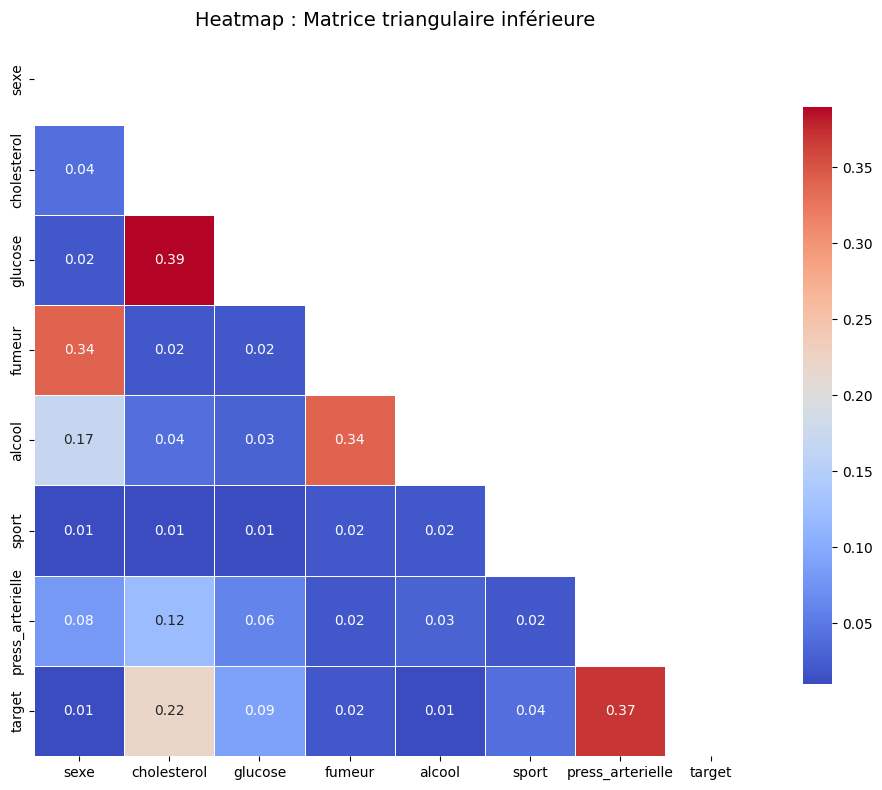

In [131]:
# Cr√©ation du masque de la partie sup√©rieure
mask = np.triu(np.ones_like(df_assoc, dtype=bool))

# Cr√©ation de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_assoc,
            mask=mask,
            cmap="coolwarm",
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8})

plt.title("Heatmap : Matrice triangulaire inf√©rieure", fontsize=14)
plt.tight_layout()
plt.show()

**√âchelle d‚Äôinterpr√©tation du V de Cram√©r**

| **Valeur de V**       | **Force de l‚Äôassociation**         |
|------------------------|------------------------------------|
| 0.00 ‚Äì 0.10            | Nulle √† tr√®s faible                |
| 0.10 ‚Äì 0.20            | Faible                             |
| 0.20 ‚Äì 0.40            | Mod√©r√©e                            |
| 0.40 ‚Äì 0.60            | Forte                              |
| 0.60 ‚Äì 0.80            | Tr√®s forte                         |
| 0.80 ‚Äì 1.00            | Quasi-parfaite ou redondante       |

On peut voir une **relation mod√©r√© voir presque forte** entre la variable cible et **la pression art√©rielle** du patient, et une **relation mod√©r√©e** entre la cible et le **taux de cholest√©rol** dans le sang.

On peut √©galement voir les **relations fortes** entre le **taux de glucose et le taux de cholest√©rol**; les patients **fumeurs** et ceyx qui **consomment de l'alcool** et entre les variables **fumeur et sex**.

A ce stade il serait prudent de conserver toutes les variables.

## 2. Variables num√©riques avec la cible

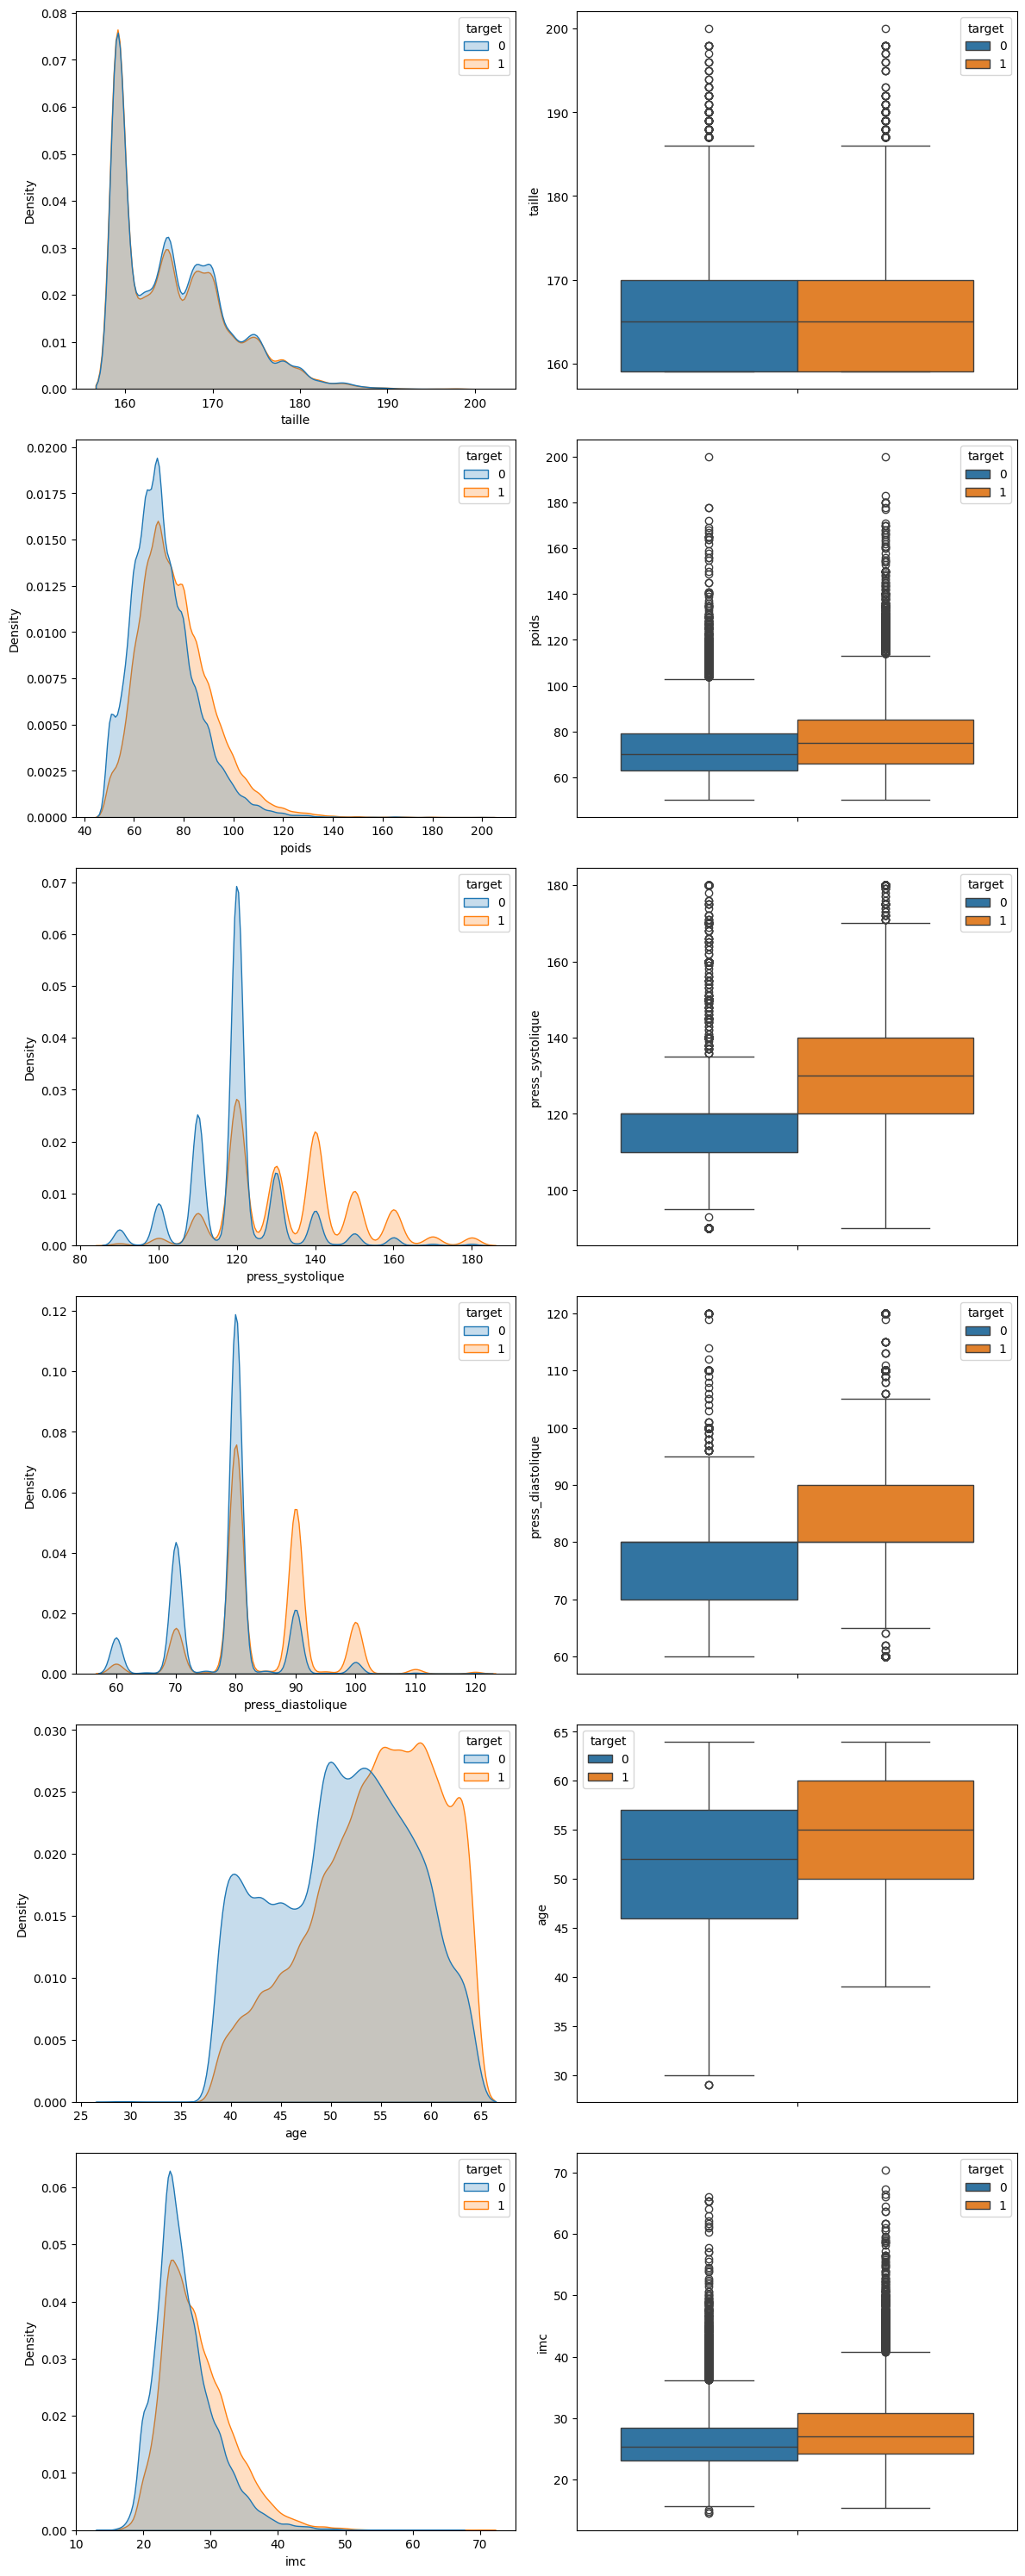

In [132]:
fig, axes = plt.subplots(num_var.shape[1], 2, figsize = (12, 30))
i = 0
var_list = list(num_var.columns)
num_var["target"] = data["target"]
for var in var_list:
  sns.kdeplot(x = var, data = num_var, fill = True, hue = "target", ax = axes[i, 0])
  sns.boxplot(y = var, data = num_var, hue = "target", ax = axes[i, 1])
  i = i + 1
plt.tight_layout()
plt.show()

On peut voir que les distributions au de la modalit√© malade (1) et pas malade (0) sont presque identiques, ce qui sugg√®re une liaison tr√®s faible ou inexistante, entre la ciblent et certaines variables telles que : **imc**, **taille**, **poids**.

Les pressions art√©rielle, systolique et diastolique semblent √™tre li√©es √† la vriable cible. Ainsi que l'√¢ge.

Les distributions des variables num√©riques au sein de chaque modalit√© de la variable cible ne semblent pas gaussiennes. Par cons√©quent les tests **t de Student** ou m√™me l'**ANOVA** n'est pas appropri√©.

Il convient donc l'√©valuer l'existance ou non d'un lien significatif entre les variables num√©riques et la cible √† travers le test de **Kruskal-Wallis**

In [133]:
from scipy.stats import kruskal

In [134]:
def test_kruskal(variables, categorie):
    resultat = {"stat": [], "p-value": [], "Association with target": []}
    var_names = variables.columns

    for var in var_names:
        # Cr√©ation des groupes en fonction de la variable cat√©gorielle
        groupes = [
            variables[categorie == cat][var].dropna()
            for cat in categorie.unique()
        ]

        # Test de Kruskal-Wallis
        stat, p = kruskal(*groupes)
        resultat["stat"].append(stat)
        resultat["p-value"].append(p)
        resultat["Association with target"].append(p < 0.05)

    return pd.DataFrame(resultat, index=var_names)

In [135]:
num_var = num_var.drop("target", axis = 1)

Si la **p-valeur** du test de Kruskal-Wallis est **inf√©rieure √† 0.05**, cela indique le **rejet de l'hypoth√®se nulle**, qui stipule que les distributions des groupes sont identiques. **Cela signifie qu'il existe une diff√©rence significative entre au moins deux groupes**, ou encore que la variable num√©rique d'int√©r√™t et la variable cible (qualitative) sont li√©es.

In [136]:
test_kruskal(num_var, data["target"])

stat   p-value  Association with target
taille                 7.731862  0.005425                     True
poids               2180.507985  0.000000                     True
press_systolique   13826.404808  0.000000                     True
press_diastolique   8612.508691  0.000000                     True
age                 3822.659087  0.000000                     True
imc                 2554.758315  0.000000                     True

**Toutes les variables num√©riques** semblent avoir un **lien statistiquement significatif** **avec la variable cible**, en particulier la **taille** et le **poids** o√π les distributions des patients malades et non-malade paraissaient visuellement assez proches.

## Variables num√©riques avec le **logit** de la variable cible:
V√©rification de l'hypoth√®se de la relation lin√©iare entre les variables lin√©aire et le **logit** de la variable cible.

In [137]:
def plot_logit(num_df, target_df, n_bins=10):
    target_col = target_df.columns[0]
    full_df = num_df.copy()
    full_df[target_col] = target_df[target_col].astype(int)

    num_vars = num_df.columns
    n_rows = len(num_vars)

    plt.figure(figsize=(6, 4 * n_rows))

    for idx, var in enumerate(num_vars, start=1):
        # intervalle de la variable
        full_df[f"{var}_bin"] = pd.cut(full_df[var], bins=n_bins)

        # Probabilit√© empirique par intervalle
        grouped = full_df.groupby(f"{var}_bin")[target_col].mean().reset_index()
        grouped.columns = [f"{var}_bin", "prob"]

        # Centre des intervalles
        grouped["center"] = full_df.groupby(f"{var}_bin")[var].mean().reset_index(drop=True)

        # Calcul du logit
        grouped["logit"] = np.log(grouped["prob"] / (1 - grouped["prob"]))
        grouped = grouped.dropna(subset=["center", "logit"])
        grouped = grouped[np.isfinite(grouped["logit"])]

        # R√©gression lin√©aire pour la tendance
        coeffs = np.polyfit(grouped["center"], grouped["logit"], deg=1)
        line = np.poly1d(coeffs)

        # Affichage
        plt.subplot(n_rows, 1, idx)
        plt.scatter(grouped["center"], grouped["logit"], label="Logits observ√©s")
        plt.plot(grouped["center"], line(grouped["center"]), color="red", label="Droite de r√©gression")
        plt.title(f"Relation logit ‚Äì {var}")
        plt.xlabel(var)
        plt.ylabel("logit")
        plt.legend()

    plt.tight_layout()
    plt.show()

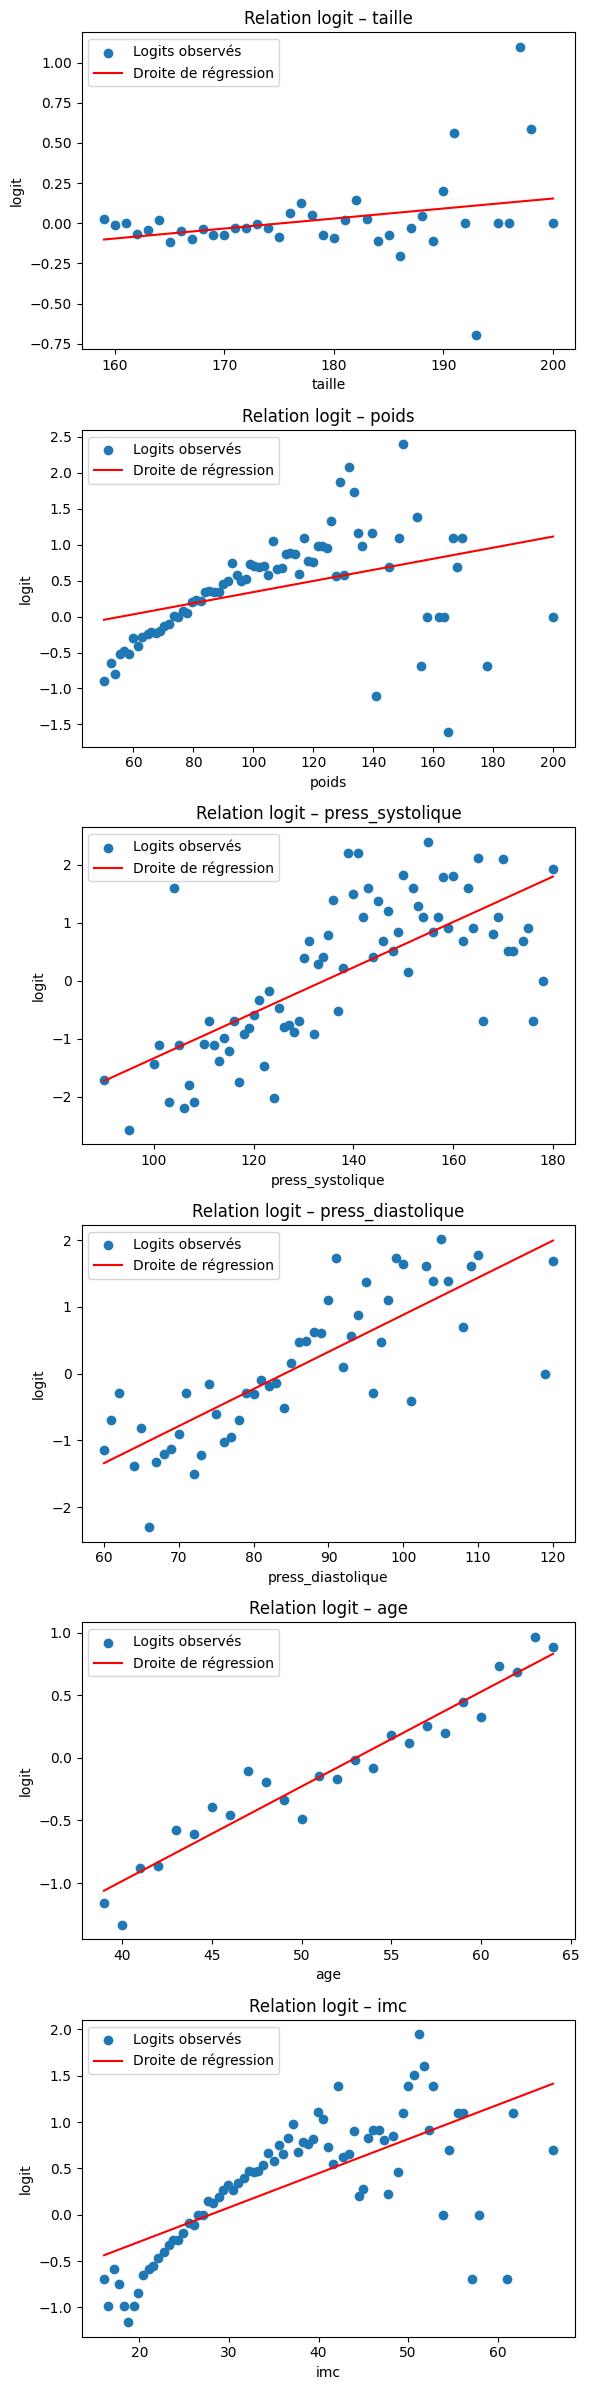

In [138]:
plot_logit(num_var, pd.DataFrame(data["target"]), 100)

Remarquons que les variables **age**, **taille** et **press_diastolique** semblent avoir une relation visuellement lin√©aire avec le **logit** de la variable cible.

Cependant, l'**imc** et le **poids** et la **pression systolique** ne semblent pas avoir cette relation lin√©aire.

Nous allons calculer les co√©fficients de corr√©lation.

In [139]:
from scipy.stats import spearmanr, kendalltau

In [140]:
def logit_correlations(num_df, target_df, n_bins=100):
    target_col = target_df.columns[0]
    full_df = num_df.copy()
    full_df[target_col] = target_df[target_col].astype(int)

    results = []

    for var in num_df.columns:
        # Binning de la variable
        full_df[f"{var}_bin"] = pd.cut(full_df[var], bins=n_bins)

        # Moyenne de la cible par bin
        grouped = full_df.groupby(f"{var}_bin")[target_col].mean().reset_index()
        grouped.columns = [f"{var}_bin", "prob"]

        # Centre des intervalles pour X
        grouped["center"] = full_df.groupby(f"{var}_bin")[var].mean().reset_index(drop=True)

        # Calcul du logit
        grouped["logit"] = np.log(grouped["prob"] / (1 - grouped["prob"]))
        grouped = grouped.dropna(subset=["center", "logit"])
        grouped = grouped[np.isfinite(grouped["logit"])]

        if len(grouped) > 1:
            pearson_corr = grouped["center"].corr(grouped["logit"], method='pearson')
            spearman_corr = spearmanr(grouped["center"], grouped["logit"]).correlation
            kendall_corr = kendalltau(grouped["center"], grouped["logit"]).correlation
        else:
            pearson_corr = spearman_corr = kendall_corr = np.nan

        results.append({
            "Variable": var,
            "Pearson": pearson_corr,
            "Spearman": spearman_corr,
            "Kendall": kendall_corr
        })

    df_corr = pd.DataFrame(results).set_index("Variable")
    return df_corr

In [141]:
logit_correlations(num_var, pd.DataFrame(data["target"]), 100)

Pearson  Spearman   Kendall
Variable                                       
taille             0.290181  0.260657  0.170326
poids              0.379071  0.524048  0.510499
press_systolique   0.711117  0.709922  0.528116
press_diastolique  0.811044  0.842368  0.669133
age                0.963963  0.974017  0.876923
imc                0.674831  0.707435  0.617391

Ap√®s calcul:
- **age** et **press_diastolique**: tr√®s fortement corr√©l√© avec le logit de la cible.
- **press_systolique** et **imc** fortement corr√©l√©s au logit
- **poids** corr√©lation mod√©r√© avec le logit de la variable cible et la **taille** est faiblement corr√©l√©e avec le logit de la cible.

## Variables num√©riques entre elles:
Indentification des variables fortement corr√©l√©es pour √©viter la redondance et la multicolin√©arit√©

In [142]:
num_var.head(1)

taille  poids  press_systolique  press_diastolique  age       imc
0     168   62.0               110                 80   50  21.96712

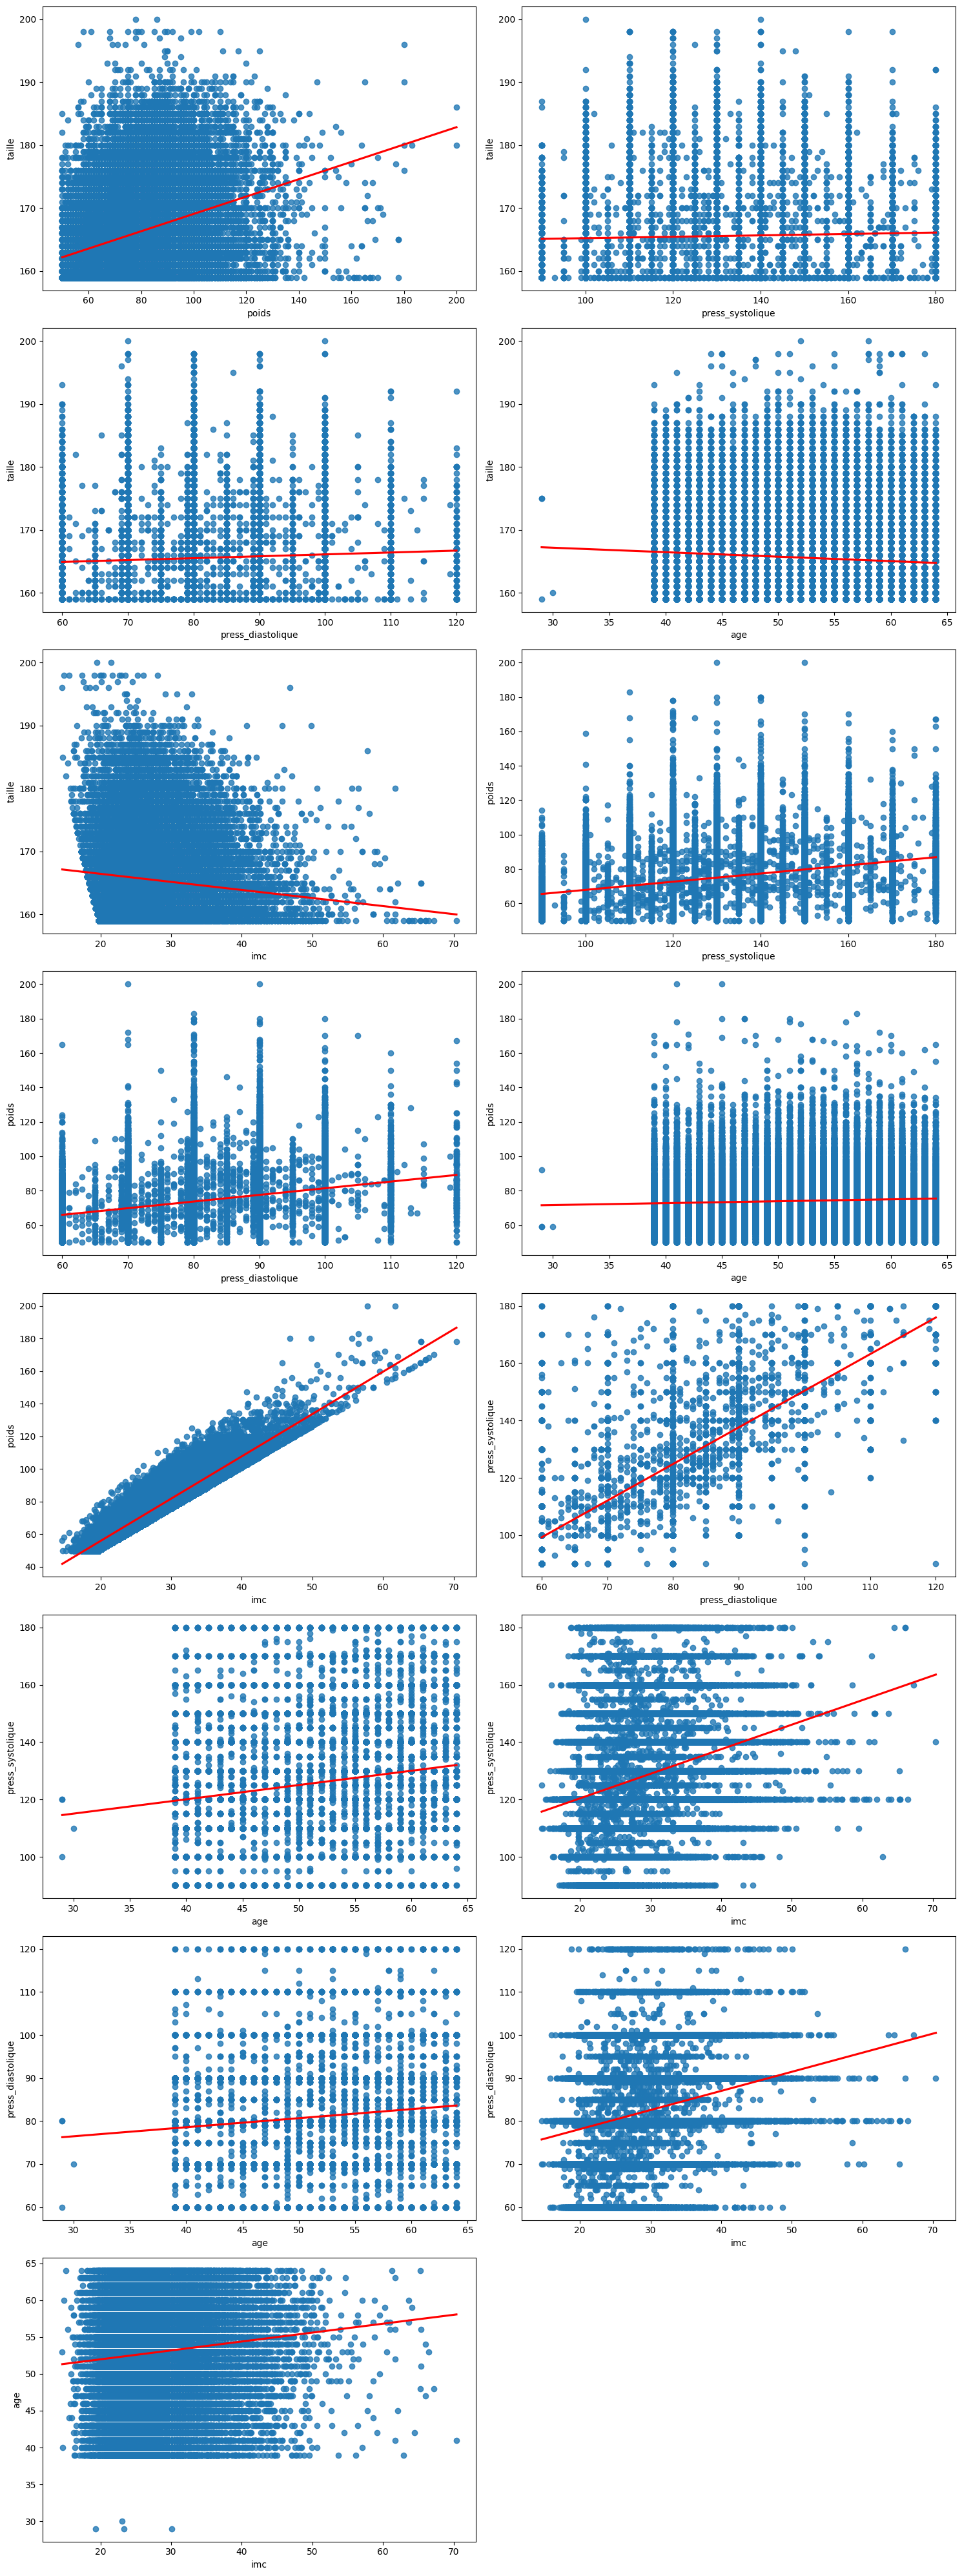

In [143]:
fig, axes = plt.subplots(8, 2, figsize = (15, 40))
# taille - poids
sns.regplot(y = num_var["taille"], x = num_var["poids"], line_kws={"color": "red"}, ci = None, ax = axes[0, 0])
# taille - pression systolique
sns.regplot(y = num_var["taille"], x = num_var["press_systolique"], line_kws={"color": "red"}, ci = None, ax = axes[0, 1])
# taille - pression diastolique
sns.regplot(y = num_var["taille"], x = num_var["press_diastolique"], line_kws={"color": "red"}, ci = None, ax = axes[1, 0])
# taille - age
sns.regplot(y = num_var["taille"], x = num_var["age"], line_kws={"color": "red"}, ci = None, ax = axes[1, 1])
# taille - imc
sns.regplot(y = num_var["taille"], x = num_var["imc"], line_kws={"color": "red"}, ci = None, ax = axes[2, 0])
# poids - pression systolique
sns.regplot(y = num_var["poids"], x = num_var["press_systolique"], line_kws={"color": "red"}, ci = None, ax = axes[2, 1])
# poids - pression diastolique
sns.regplot(y = num_var["poids"], x = num_var["press_diastolique"], line_kws={"color": "red"}, ci = None, ax = axes[3, 0])
# poids - age
sns.regplot(y = num_var["poids"], x = num_var["age"], line_kws={"color": "red"}, ci = None, ax = axes[3, 1])
# poids - imc
sns.regplot(y = num_var["poids"], x = num_var["imc"], line_kws={"color": "red"}, ci = None, ax = axes[4, 0])
# press_systolique - pression diastolique
sns.regplot(y = num_var["press_systolique"], x = num_var["press_diastolique"], line_kws={"color": "red"}, ci = None, ax = axes[4, 1])
# press_systolique - age
sns.regplot(y = num_var["press_systolique"], x = num_var["age"], line_kws={"color": "red"}, ci = None, ax = axes[5, 0])
# press_systolique - imc
sns.regplot(y = num_var["press_systolique"], x = num_var["imc"], line_kws={"color": "red"}, ci = None, ax = axes[5, 1])
# press_diastolique - age
sns.regplot(y = num_var["press_diastolique"], x = num_var["age"], line_kws={"color": "red"}, ci = None, ax = axes[6, 0])
# press_diastolique - imc
sns.regplot(y = num_var["press_diastolique"], x = num_var["imc"], line_kws={"color": "red"}, ci = None, ax = axes[6, 1])
# age - imc
sns.regplot(y = num_var["age"], x = num_var["imc"], line_kws={"color": "red"}, ci = None, ax = axes[7, 0])
axes[7, 1].axis("off")
plt.tight_layout()
plt.show()

Visuellement il n'y a que l'**imc** et le **poids** qui sont fortement corr√©l√©s, ce qui est coh√©rent du fait que l'**imc** est directement proportionnel au poids et invers√©ment proportionnel au carr√© de la taille.

In [144]:
# correlation de Pearson
num_var.corr(method = "pearson")

taille     poids  press_systolique  press_diastolique  \
taille             1.000000  0.307517          0.028051           0.043271   
poids              0.307517  1.000000          0.267566           0.249429   
press_systolique   0.028051  0.267566          1.000000           0.731812   
press_diastolique  0.043271  0.249429          0.731812           1.000000   
age               -0.075924  0.053111          0.211314           0.155777   
imc               -0.100612  0.912948          0.267409           0.242091   

                        age       imc  
taille            -0.075924 -0.100612  
poids              0.053111  0.912948  
press_systolique   0.211314  0.267409  
press_diastolique  0.155777  0.242091  
age                1.000000  0.088913  
imc                0.088913  1.000000

L'observation visuelle s'appuie par le co√©fficient de corr√©lation de Pearson des variables **imc** et **poids** qui indique une forte realtion lin√©aire positive (0.91).

On peut aussi voir que les pressions art√©rielles **systolique** et **diastolique** sont forttement corr√©l√©es.

Toutefois, puisque les relations entre les autres variables ne sont pas lin√©aires on visualiser les heatmap de corr√©lation avec les co√©fficients de Spearman (relation monotone).

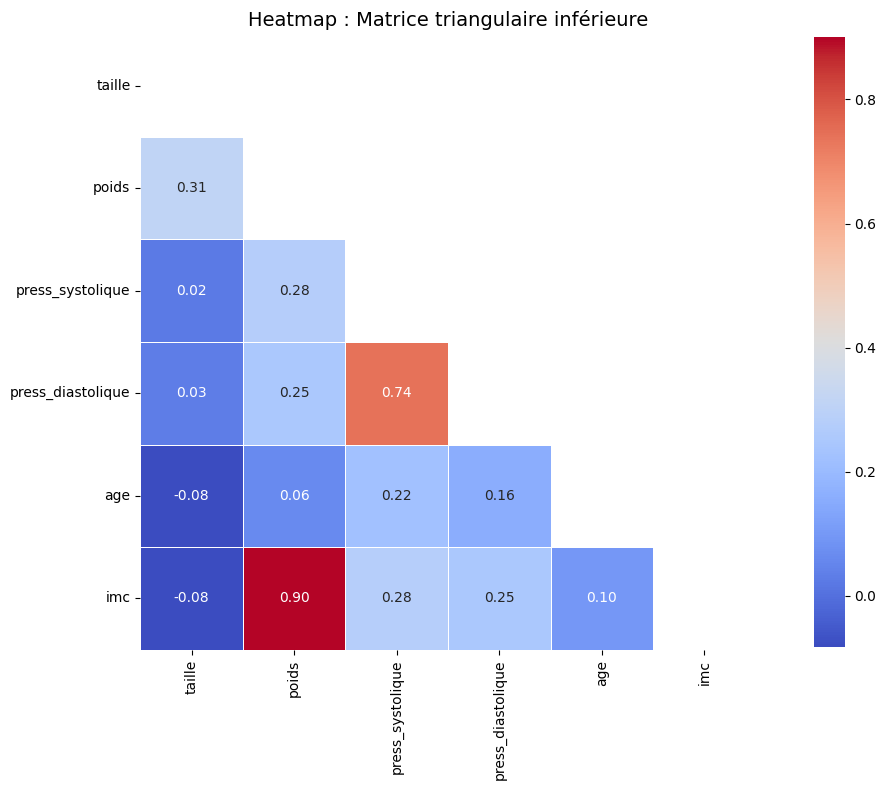

In [145]:
# Cr√©ation du masque de la partie sup√©rieure
mask = np.triu(np.ones_like(num_var.corr(method = "spearman"), dtype=bool))

# Cr√©ation de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(num_var.corr(method = "spearman"),
            mask=mask,
            cmap="coolwarm",
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.99})

plt.title("Heatmap : Matrice triangulaire inf√©rieure", fontsize=14)
plt.tight_layout()
plt.show()

# Standardisation et sauvegarde des donn√©es nettoy√©es:

Etant donn√© que les variables num√©riques sont exprim√©es en des unit√©s diff√©rentes (taille : cm, poids : kg, etc..), il convient de les standardiser afin de les ramener √† des √©chelles comparables. Ces donn√©es nettoy√©es seront sauvegard√©es pour entrainer d'autres mod√®les de classification.

In [146]:
cat_var.head(2)

sexe cholesterol glucose fumeur alcool sport press_arterielle target
0    1           1       1      0      0     1                3      0
1    0           3       1      0      0     1                4      1

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
# Standardisation des donn√©es
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_var)
num_var = pd.DataFrame(scaled_data, columns=num_var.columns)

In [149]:
data = pd.concat([num_var, cat_var], axis = 1)

In [150]:
data.head(3)

taille     poids  press_systolique  press_diastolique       age  \
0  0.388700 -0.859102         -1.029656          -0.138226 -0.417089   
1 -1.030088  0.765098          0.849859           0.955397  0.321479   
2 -0.084229 -0.717867          0.223354          -1.231849 -0.269376   

        imc sexe cholesterol glucose fumeur alcool sport press_arterielle  \
0 -1.022635    1           1       1      0      0     1                3   
1  1.315264    0           3       1      0      0     1                4   
2 -0.713585    0           3       1      0      0     0                3   

  target  
0      0  
1      1  
2      1

In [151]:
data.to_csv("cardio_data_cleaned.csv", index = False)

# S√©paration des donn√©es d'apprentissage et de test.

In [152]:
# variable cible
y = data["target"]
# variables explicatives
X = data.drop("target", axis = 1)

In [153]:
seed = 12

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, test_size = 0.2, stratify = y)

# Entra√Ænement du mod√®le

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
# instanciation du mod√®le
model = LogisticRegression(random_state = seed)

In [158]:
# entra√Ænement du mod√®le
model.fit(X_train, y_train)

LogisticRegression(random_state=12)

# Pr√©diction sur les donn√©es de Test

In [159]:
y_pred = model.predict(X_test)

# interpr√©tation des co√©fficients

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay

In [161]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = "macro")
performances = pd.DataFrame({"Performances " : [acc, prec, rec, f1]}, index = ["accuracy", "precision", "recall", "f1_score"])

In [162]:
performances

Performances 
accuracy        0.726706
precision       0.755786
recall          0.659489
f1_score        0.725136

**R√©sultats**:

1. **accuracy** : est la proportion des pr√©dictions correctes de la classe 0 et de la classe 1 sur l'ensemble des observations des donn√©es de test. ICi le mod√®le a pr√©dit correctement 75% des patients.
---
2. **precision**: le ratio du nombre des pr√©dictions correctes de la classe 1 par rapport au nombre des pr√©dictions de la classes 1 du mod√®le (pr√©dictions de la classe 1 correctes et incorrectes), soit 75%.
---
3. **recall**: est le rapport entre le nombre des patients malades correctement pr√©dits et le nombre de tous les  patients malades des donn√©es de test. Ici le mod√®le a correctement pr√©dit 65% des patients malades parmi tous les individus malades de l'ensemble de test.
---
4. **f1-score** : est une moyenne harmonique, une m√©trique d‚Äô√©valuation qui combine deux mesures fondamentales : **la pr√©cision** (pr√©cision des pr√©dictions positives) et le **rappel** (capacit√© √† retrouver tous les vrais positifs).


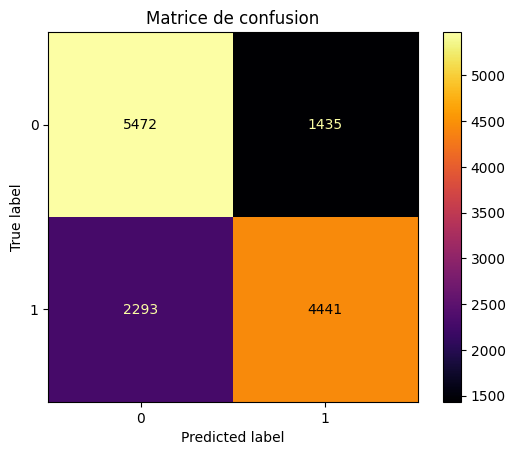

In [163]:
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, y_pred), display_labels= model.classes_)
disp.plot(cmap='inferno')
plt.title("Matrice de confusion")
plt.show()

La matrice de confusion permet d'afficher les informations sur le nombre des patients pr√©dits comme malades (vrai et faux)  et ceux pr√©dits comme n'√©tant pas malades (√† raison ou √† tord).

Le cas de la premi√®re ligne o√π sur un total de **6907** patients r√©ellement pas malades, **5472** ont √©t√© pr√©dites √† raison comme pas malades (79%), tandis que 1435 ont √©t√© pr√©dites, √† tord, comme malades (20%). Ainsi, le mod√®le apprend assez bien la classe 0.

# Evaluation des performances:

**Scikit-learn** est optimis√© pour l'entra√Ænement rapide et l'utilisation pratique (pr√©dictions, transformations, pipelines, etc.), mais il ne calcule pas les p-valeurs ou ne donne pas un r√©sum√© statistique.

Cependant, **Statsmodels** est con√ßu sp√©cifiquement pour l'analyse statistique et fournit des outils comme le test de Wald et des diagnostics d√©taill√©s.

In [164]:
import statsmodels.api as sm

In [165]:
# ajouter une constante  1 (colonne repr√©sentant l'ordonn√©e √† l'origine) aux donn√©es d'apprentissage
X_train_const = sm.add_constant(X_train)

In [166]:
X_train_const.head(3)

const    taille     poids  press_systolique  press_diastolique  \
68122    1.0  0.546344 -0.011693         -1.029656          -1.231849   
10764    1.0 -0.241872  0.412011         -0.403151          -0.138226   
17128    1.0  2.438061  0.906333         -0.403151          -0.138226   

            age       imc sexe cholesterol glucose fumeur alcool sport  \
68122  0.469192 -0.231832    0           1       1      0      0     1   
10764  0.026052  0.537389    0           1       1      0      0     0   
17128  0.469192 -0.102147    0           1       1      0      0     1   

      press_arterielle  
68122                1  
10764                3  
17128                3

In [180]:
# cr√©ation du nouveau mod√®le
new_model = sm.Logit(y_train, X_train_const)

In [181]:
# ajustement du mod√®lle
new_model = new_model.fit()

Optimization terminated successfully.
         Current function value: 0.561436
         Iterations 6


In [182]:
# affichage du r√©sultat
print(new_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                54564
Model:                          Logit   Df Residuals:                    54550
Method:                           MLE   Df Model:                           13
Date:                Sun, 29 Jun 2025   Pseudo R-squ.:                  0.1899
Time:                        14:30:30   Log-Likelihood:                -30634.
converged:                       True   LL-Null:                       -37817.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2266      0.074     -3.055      0.002      -0.372      -0.081
taille               -0.0801      0.058     -1.385      0.166      -0.194       0.033
poids                 0.

# Interpr√©tation d√©taill√©e des r√©sultats de la r√©gression logistique

## **Ent√™te g√©n√©rale**
### 1. **Logit Regression Results**
- Indique que les r√©sultats proviennent d'une r√©gression logistique.

### 2. **Dep. Variable**: `target`
- Variable d√©pendante (ou cible) : ici, `target`.
- Cela correspond √† la variable binaire que l‚Äôon cherche √† pr√©dire (par exemple, 0 = sain, 1 = malade).

### 3. **No. Observations**: `54564`
- Nombre total d‚Äôobservations utilis√©es pour ajuster le mod√®le.

### 4. **Model**: `Logit`
- Mod√®le utilis√© : r√©gression logistique.

### 5. **Df Residuals**: `54551`
- Degr√©s de libert√© r√©siduels :  
  $ \text{Df Residuals} = \text{No. Observations} - \text{Df Model} - 1 $  
  Ici, $ 54564 - 13 - 1 = 54550 $.

### 6. **Method**: `MLE`
- M√©thode utilis√©e pour ajuster le mod√®le : **Maximum Likelihood Estimation** (MLE).

### 7. **Df Model**: `13`
- Degr√©s de libert√© du mod√®le : correspond au nombre de variables explicatives incluses dans le mod√®le (13 ici).

### 8. **Date** et **Time**
- Date et heure d‚Äôex√©cution de l‚Äôanalyse.

### 9. **Pseudo R-squ.**: `0.1899`
- **Pseudo-$ R^2 $** : Une mesure de la qualit√© de l‚Äôajustement, qui n‚Äôest pas directement comparable au $ R^2 $ des r√©gressions lin√©aires.
  - Ici, $ 0.1899 $ signifie que le mod√®le explique environ 18,99‚ÄØ% de la variabilit√© de la cible.

### 10. **Log-Likelihood**: `-30634`
- Log-vraisemblance : mesure de la "log-probabilit√©" que le mod√®le ait g√©n√©r√© les donn√©es observ√©es. Une valeur plus proche de 0 indique un meilleur ajustement.

### 11. **Converged**: `True`
- Indique si l‚Äôalgorithme d‚Äôoptimisation a converg√© (r√©sultat valide).

### 12. **LL-Null**: `-37817`
- Log-vraisemblance du mod√®le nul (sans variables explicatives, uniquement l‚Äôintercept).

### 13. **LLR p-value**: `0.000`
- $ p $-valeur pour le test du rapport de vraisemblance (LR test).  
  - Ici, $ p < 0.05 $ indique que le mod√®le avec variables explicatives est significativement meilleur que le mod√®le nul.

---

## **Table des coefficients**
| **Colonne**       | **Explication**                                                                                                                                                               |
|--------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **coef**           | Coefficient estim√© pour chaque variable ($ \beta_i $).                                                                                                                      |
| **std err**        | Erreur standard associ√©e √† chaque coefficient (mesure de l‚Äôincertitude sur l‚Äôestimation).                                                                                   |
| **z**              | Valeur $ z $ pour le test $ H_0 : \beta_i = 0 $ (coefficient non significatif). Calcul√©e comme $ \text{coef} / \text{std err} $.                                           |
| **P>|z|**          | $ p $-valeur associ√©e √† $ z $. Si $ p < 0.05 $, on rejette $ H_0 $, et on conclut que la variable est significativement li√©e √† la cible.                                     |
| **[0.025, 0.975]** | Intervalle de confiance √† 95% pour le coefficient estim√©. Si cet intervalle ne contient pas 0, alors la variable est statistiquement significative au niveau de 5%.        |

---

### **Intercept (`const`)**
- **coef = -0.2266** : Intercept estim√©. Si toutes les variables explicatives sont nulles, le logit est $ -0.2266 $.
- **P>|z| = 0.002** **(la p_valeur)** : Significatif au niveau 5%, l'intercept est utile.

---

### **`taille`**
- **coef = -0.0801** : La taille (en unit√© de mesure utilis√©e) est faiblement n√©gative, donc *chaque unit√© suppl√©mentaire de taille diminue l√©g√®rement la probabilit√© d'avoir une maladie cardiovasculaire*.

- **P>|z| = 0.166** : Non significatif ($ p > 0.05 $), cette variable n‚Äôest pas li√©e de mani√®re significative √† la cible.

---

### **`poids`**
- **coef = 0.3098** : *Chaque unit√© de poids augmente le risque d'√™tre malade*


- **P>|z| = 0.030** : Tr√®s significatif, cette variable est fortement li√©e √† la cible.

---

### **`press_systolique`**
- **coef = 0.9240** : Une augmentation d'une unit√© de pression systolique a pour effet **d'augmenter significativement la probabilit√© d'avoir une maladie cardiovasculaire**.

- **P>|z| = 0.000** : Tr√®s significatif.

---

### **`press_diastolique`**
- **coef = 0.1173** : Chaque unit√© suppl√©mentaire de pression diastolique a comme effet d'augmenter le risque de maladie.

- **P>|z| = 0.000** : Tr√®s significatif.

---

### **`age`**
- **coef = 0.3349** : Chaque ann√©e suppl√©mentaire augmente fortement le risque d'√™tre malade.

- **P>|z| = 0.000** : Tr√®s significatif.

---

### **`sexe`**
- **coef = -0.0362** : Le sexe a un effet n√©gatif tr√®s faible  sur le fait d'√™tre malade, c'est-√†-dire qu'il est moins probable d'avoir la maladie cardivasculaire en √©tant un homme .

- **P>|z| = 0.151** : Non significatif.

---

### **`cholesterol`**
- **coef = 0.4998** : Une augmentation d'une unit√© du taux de cholest√©rol dans le sang augmente fortement le probabilit√© d'√™tre malade.

- **P>|z| = 0.000** : Tr√®s significatif.

---

### **`glucose`**
- **coef = -0.1138** : Une augmentation du glucose a comme effet de diminuer la probabilit√© d'√™tre malade. (**pas coh√©rent avec la r√©alit√© m√©dicale**)
- **P>|z| = 0.000** : Tr√®s significatif.

---

### **Autres variables (`fumeur`, `alcool`, `sport`, `press_arterielle`)**
- Interpr√©ter les coefficients et les $ p $-valeurs de mani√®re similaire‚ÄØ:
  - Si $ p-valeur < 0.05 $, l‚Äôeffet est significatif.
  - Le signe et la magnitude du coefficient indiquent l‚Äôimpact sur l'augmentation (co√©fficient positif) ou la diminution (signe n√©gatif) de la probabilit√© d'√™tre malade.


### **Odds et Odds Ratio en R√©gression Logistique**

#### **1. Qu'est-ce que l'Odds ?**
L'**odds** repr√©sente le rapport entre la probabilit√© de succ√®s $P(\text{succ√®s})$ et la probabilit√© d'√©chec $P(\text{√©chec})$ dans un sch√©ma de Bernoulli¬†:

$$
\text{Odds} = \frac{P(\text{succ√®s})}{P(\text{√©chec})} = \frac{P(y=1)}{1 - P(y=1)}
$$

- Si $\text{Odds} > 1$, le succ√®s est plus probable que l'√©chec.  
- Si $\text{Odds} < 1$, l'√©chec est plus probable que le succ√®s.  
- Si $\text{Odds} = 1$, les chances de succ√®s et d'√©chec sont √©gales.

#### **2. Qu'est-ce que l'Odds Ratio ?**
L'**odds ratio** est une mesure de l'effet d'une variable explicative sur les chances de succ√®s. Il compare les *odds* entre deux groupes ou deux niveaux d'une variable, en maintenant les autres constantes.

En r√©gression logistique, on peut obtenir l'odds ratio en exponentiant le coefficient $\beta$ de la variable dans le mod√®le¬†:

$$
\text{Odds Ratio} = e^{\beta}
$$

In [183]:
odds_ratio = pd.DataFrame(new_model.params, columns= ["coeff"])

In [184]:
odds_ratio["odds_ratio"] = np.exp(odds_ratio["coeff"])

In [185]:
odds_ratio

coeff  odds_ratio
const             -0.226592    0.797246
taille            -0.080113    0.923012
poids              0.309812    1.363169
press_systolique   0.923981    2.519299
press_diastolique  0.117301    1.124458
age                0.334874    1.397764
imc               -0.150304    0.860447
sexe              -0.036168    0.964478
cholesterol        0.499780    1.648359
glucose           -0.113831    0.892409
fumeur            -0.123778    0.883576
alcool            -0.231050    0.793700
sport             -0.238413    0.787877
press_arterielle  -0.024631    0.975670

### **R√®gles pour interpr√©ter un Odds Ratio ($OR$)**

1. **Si le coefficient ($\beta$) est positif :**  
   - L'odds ratio ($OR = e^\beta$) est sup√©rieur √† 1.  
   - Le changement relatif des odds est donn√© par $OR - 1$, exprim√© en pourcentage.  
   - **Exemple :** Si $OR = 1.5$, cela signifie que les odds (**probabilit√© que le patient ait une maladie cardiovasculaire**)  augmentent de $1.5 - 1 = 0.5$, soit $50\%$.

2. **Si le coefficient ($\beta$) est n√©gatif :**  
   - L'odds ratio ($OR = e^\beta$) est inf√©rieur √† 1.  
   - La diminution relative des odds est donn√©e par $1 - OR$, exprim√©e en pourcentage.  
   - **Exemple :** Si $OR = 0.8$, cela signifie que les odds diminuent de $1 - 0.8 = 0.2$, soit $20\%$.

---

#### **Pourquoi cette diff√©rence ?**  
L'odds ratio ($OR$) est toujours une valeur positive.  
Quand $OR > 1$, on parle d'une augmentation des odds.  
Quand $OR < 1$, on parle d'une diminution des odds.  
L'√©cart √† 1 est interpr√©t√© diff√©remment selon le signe du coefficient, pour indiquer si les odds augmentent ou diminuent.

---

### **Interpr√©tation des Coefficients et Odds Ratios**

1. **Constante (`const`)**  
   - Coefficient : -0.227  
   - Odds Ratio : 0.797  
   - **Interpr√©tation :** Ce coefficient n√©gatif indique une diminution de la probabilit√© d‚Äôobserver un malade lorsque toutes les autres variables sont √† z√©ro. Les odds de succ√®s (malade) sont 1 - 0.797 = 0.203, soit 20.3% plus faibles que celles de l'√©chec (non-malade).

2. **Taille**  
   - Coefficient : -0.080  
   - Odds Ratio : 0.923  
   - **Interpr√©tation :** Ce coefficient n√©gatif traduit une diminution des odds d‚Äôobserver un malade pour chaque unit√© suppl√©mentaire de taille. Les odds diminuent de 1 - 0.923 = 0.077, soit 7.7\%.

3. **Poids**  
   - Coefficient : 0.310  
   - Odds Ratio : 1.363  
   - **Interpr√©tation :** Ce coefficient positif signifie une augmentation des odds d‚Äôobserver un malade pour chaque unit√© de poids. Les odds augmentent de 1.363 - 1 = 0.363, soit 36.3%.

4. **Pression systolique**  
   - Coefficient : 0.924  
   - Odds Ratio : 2.519  
   - **Interpr√©tation :** Chaque unit√© suppl√©mentaire de pression systolique multiplie les odds par $2.519$, soit une augmentation de  2.519 - 1 = 1.519, soit 151.9%.

5. **Pression diastolique**  
   - Coefficient : 0.117  
   - Odds Ratio : 1.124  
   - **Interpr√©tation :** Une augmentation de la pression diastolique entra√Æne une augmentation des odds d‚Äôobserver un malade de 1.124 - 1 = 0.124, soit 12.4%.

6. **√Çge**  
   - Coefficient : 0.335  
   - Odds Ratio : 1.398  
   - **Interpr√©tation :** Chaque ann√©e suppl√©mentaire augmente les odds d‚Äôobserver un malade de 1.398 - 1 = 0.398, soit 39.8%.

7. **IMC (Indice de Masse Corporelle)**  
   - Coefficient : -0.150  
   - Odds Ratio : 0.860  
   - **Interpr√©tation :** Une unit√© suppl√©mentaire d‚ÄôIMC r√©duit les odds d‚Äôobserver un malade de 1 - 0.860 = 0.140, soit 14.0%.

8. **Sexe**  
   - Coefficient : -0.036  
   - Odds Ratio : 0.964  
   - **Interpr√©tation :** Une faible diminution des odds (1 - 0.964 = 0.036$, soit 3.6%) est associ√©e √† cette variable.

9. **Cholest√©rol**  
   - Coefficient : 0.500  
   - Odds Ratio : 1.648  
   - **Interpr√©tation :** Une unit√© en plus de cholest√©rol augmente les odds d‚Äôobserver un malade de 1.648 - 1 = 0.648, soit 64.8%.

10. **Glucose**  
    - Coefficient : -0.114  
    - Odds Ratio : 0.892  
    - **Interpr√©tation :** Une unit√© suppl√©mentaire de glucose r√©duit les odds de 1 - 0.892 = 0.108, soit 10.8%.

11. **Fumeur**  
    - Coefficient : -0.124  
    - Odds Ratio : 0.884  
    - **Interpr√©tation :** √ätre fumeur r√©duit les odds d‚Äôobserver un malade de 1 - 0.884 = 0.116, soit 11.6%.

12. **Alcool**  
    - Coefficient : -0.231  
    - Odds Ratio : 0.794  
    - **Interpr√©tation :** Consommer de l‚Äôalcool r√©duit les odds de 1 - 0.794 = 0.206, soit 20.6%.

13. **Sport**  
    - Coefficient : -0.238  
    - Odds Ratio : 0.788  
    - **Interpr√©tation :** Pratiquer une activit√© sportive r√©duit les odds d‚Äôobserver un malade de 1 - 0.788 = 0.212, soit 21.2%.

14. **Pression art√©rielle moyenne**  
    - Coefficient : $-0.025$  
    - Odds Ratio : $0.976$  
    - **Interpr√©tation :** Une unit√© suppl√©mentaire de pression art√©rielle moyenne r√©duit les odds d‚Äôobserver un malade de 1 - 0.976 = 0.024, soit 2.4%.

# Pr√©dictions avec le nouveau mod√®le

In [186]:
# ajout de la constante aux donn√©es de Test
X_test_const = sm.add_constant(X_test)

In [187]:
# pr√©dictions sur les donn√©es de Test
y_pred_new = new_model.predict(X_test_const)

In [197]:
pd.Series(y_pred_new)

38665    0.419130
19854    0.132444
11809    0.562665
24744    0.435687
43009    0.262235
           ...   
17267    0.328598
55404    0.323811
32029    0.145495
49281    0.457483
51792    0.383222
Length: 13641, dtype: float64

Ici, le mod√®le ne pr√©dit pas une valeur binaire mais plut√¥t une **probabilit√© d'observer la maladie cardio vasculaire** chez le patient.

## M√©triques de performances sur le nouveau mod√®le

In [188]:
from sklearn.metrics import classification_report

In [199]:
print(classification_report(y_test, y_pred_new >= 0.5))

              precision    recall  f1-score   support

           0       0.70      0.79      0.75      6907
           1       0.76      0.66      0.70      6734

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.73     13641
weighted avg       0.73      0.73      0.73     13641



## üîç Analyse comparative des performances des deux mod√®les de classification

**Au seuil 50%**, le mod√®le `statsmodels` atteint une **accuracy globale de 73%**, ce qui signifie qu‚Äôil pr√©dit correctement pr√®s de 3 cas sur 4. Le mod√®le `sklearn`, quant √† lui, obtient une **accuracy de 72.7%**, tr√®s proche.

1. **Classe 0 (non-malade)** ‚Äî `statsmodels`
  - **Recall** = 0.79 : 79% des non-malades sont bien identifi√©s.
  - **Pr√©cision** = 0.70 : quand il pr√©dit "non-malade", il a raison dans 70% des cas.
  - ‚Üí Assez bonne capacit√© √† rep√©rer les individus sains.

2. **Classe 1 (malade)** ‚Äî `statsmodels`
  - **Recall** = 0.66 : 66% des malades sont correctement identifi√©s, mais 34% sont manqu√©s.
  - **Pr√©cision** = 0.76 : quand il pr√©dit "malade", il a raison dans 76% des cas.
  - ‚Üí Le mod√®le est fiable pour affirmer qu'une personne est malade, *mais il √©choue √† d√©tecter un tiers des vrais cas*.

---

3. ‚öñÔ∏è Comparaison avec le mod√®le de **`scikit-learn`**

| M√©trique       | Statsmodels | Scikit-learn |
|----------------|-------------|---------------|
| Accuracy       | 0.730       | 0.727         |
| Pr√©cision      | 0.755       | 0.756         |
| Rappel         | 0.659       | 0.659         |
| F1-score       | 0.725       | 0.725         |

‚Üí **Les scores sont remarquablement similaires**, preuve que les deux mod√®les capturent des patterns tr√®s proches malgr√© leurs m√©caniques internes l√©g√®rement diff√©rentes.


# Courbe ROC et l'AUC:

In [195]:
from sklearn.metrics import roc_curve, roc_auc_score

In [210]:
# seuil 50%
faux_pos, vrai_pos, seuils = roc_curve(y_test, y_pred_new >= 0.5)

In [203]:
aire_auc = roc_auc_score(y_test, y_pred_new >= 0.5)

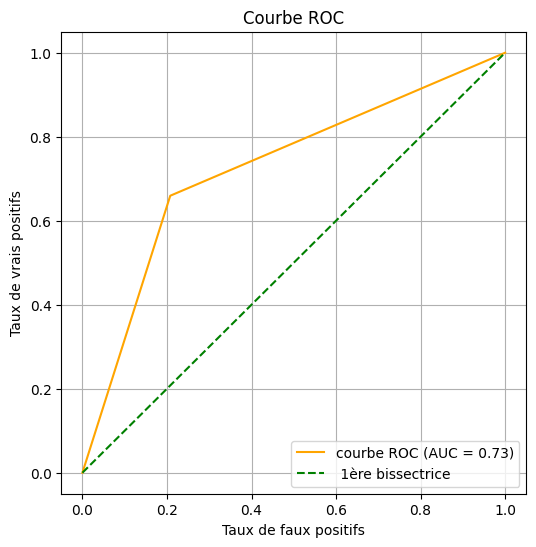

In [207]:
# Trac√© de la courbe ROC
plt.figure(figsize=(6, 6))
plt.plot(faux_pos, vrai_pos, label=f"courbe ROC (AUC = {aire_auc:.2f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='green', label = " 1√®re bissectrice")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


1. **Courbe ROC**

La courbe ROC (*Receiver Operating Characteristic*) est une repr√©sentation graphique qui illustre les performances d‚Äôun mod√®le de classification binaire pour **tous les seuils possibles** de classification.

Elle trace:
- En abscisse (axe X) : le **taux de faux positifs** (*False Positive Rate*) ‚Äì proportion de n√©gatifs mal class√©s en positifs.
- En ordonn√©e (axe Y) : le **taux de vrais positifs** (*True Positive Rate*) ‚Äì proportion de positifs correctement d√©tect√©s (aussi appel√© *Recall* ou *sensibilit√©*).

Chaque point de la courbe correspond √† un **seuil de d√©cision diff√©rent** appliqu√© aux probabilit√©s pr√©dites par le mod√®le.

Plus la courbe s'√©loigne de la premi√®re bissectrice, mieux c'est. Cela traduit le fait que le mod√®le classifie mieux que l'al√©atoire.

---

2. **AUC ‚Äì Aire sous la courbe ROC**

L‚ÄôAUC (*Area Under the Curve*) correspond √† l‚Äôaire sous la courbe ROC. Elle r√©sume **la capacit√© globale du mod√®le √† distinguer entre les deux classes**, sans d√©pendre d‚Äôun seuil particulier.

- **AUC = 1** : mod√®le parfait (s√©pare parfaitement les classes)
- **AUC = 0.5** : mod√®le al√©atoire (aucune capacit√© de discrimination)
- **AUC < 0.5** : mod√®le trompeur (classe les exemples dans le mauvais sens)

Plus l‚ÄôAUC est proche de **1**, plus le mod√®le a une **forte capacit√© discriminante**.  
Elle est tr√®s utile pour comparer plusieurs mod√®les, m√™me si leurs seuils de d√©cision diff√®rent.

# D√©termination du **seuil** (probabilit√©) optimal par la **m√©thode de Youden**

La **m√©thode de Youden** est une approche permettant de d√©terminer le seuil optimal dans un probl√®me de classification binaire, en maximisant conjointement la *sensibilit√©* et la *sp√©cificit√©* du mod√®le.
L'indice de Youden est d√©fini comme suit:

$$
J = \text{Sensibilit√©} + \text{Sp√©cificit√©} - 1
$$

La formule classique de l‚Äôindice de Youden peut √™tre reformul√©e en utilisant le fait que :

$$
\text{Sp√©cificit√©} = 1 - \text{Taux de faux positifs} = 1 - \text{FPR}
$$

En rempla√ßant dans l'expression initiale, on obtient :

$$
J = \text{Sensibilit√©} + (1 - \text{FPR}) - 1 = \text{Sensibilit√©} - \text{FPR}
$$

Ainsi, maximiser l‚Äôindice de Youden revient √† **minimiser les faux positifs tout en maximisant les vrais positifs**.

o√π:
  - **Sensibilit√©** (*taux de vrais positifs*) : proportion de positifs correctement identifi√©s.
  - **Sp√©cificit√©** (*taux de vrais n√©gatifs*) : proportion de n√©gatifs correctement identifi√©s.
  - **FPR** : False Positive Rate

---

**Avantages**

  - Fournit un **seuil optimal** √©quilibrant la d√©tection des vrais positifs et la limitation des faux positifs.
  - Pertinent quand le **co√ªt des erreurs est similaire** dans les deux classes.
  - Peut s‚Äôav√©rer **plus performant que le seuil par d√©faut ($0.5$)**, notamment en cas de classes d√©s√©quilibr√©es.

---

#### **Exemple visuel**
Le **point le plus √©loign√© de la diagonale** dans la courbe ROC correspond au **seuil optimal** selon l‚Äôindice de Youden, marquant un compromis maximal entre sensibilit√© et sp√©cificit√©.


In [221]:
faux_pos, vrai_pos, seuils = roc_curve(y_test, y_pred_new)

In [225]:
# calcul de l'indice de Youden
indice_youden = vrai_pos - faux_pos

In [226]:
# indice optimal
ind_opt = indice_youden.argmax()

In [227]:
# seuil optimal
seuil_opt = seuils[ind_opt]

In [232]:
print(f"Le seuil optimal est : {(seuil_opt*100):.1f}%")

Le seuil optimal est : 45.4%


# Pr√©dictions avec seuil optimal & Analyse des m√©triques de performances

In [237]:
# Predictions en valeurs binaires
y_pred_binary = (y_pred_new >= seuil_opt).astype("int")

In [238]:
y_pred_binary

38665    0
19854    0
11809    1
24744    0
43009    0
        ..
17267    0
55404    0
32029    0
49281    1
51792    0
Length: 13641, dtype: int64

In [239]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      6907
           1       0.73      0.72      0.73      6734

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.73     13641
weighted avg       0.73      0.73      0.73     13641



## Analyse comparative des performances selon deux seuils de classification

Deux pr√©dictions ont √©t√© effectu√©es √† partir du m√™me mod√®le, en variant uniquement le **seuil de d√©cision** :

  - **Seuil par d√©faut** : $0.5$
  - **Seuil optimis√© (indice de Youden)** : seuil d√©termin√© automatiquement √† partir de la courbe ROC pour maximiser $J = \text{Sensibilit√©} + \text{Sp√©cificit√©} - 1$

---
**1. Performance globale**

  - **Accuracy** dans les deux cas : **0.73** (identique)
  - La performance globale semble stable, mais **la r√©partition des erreurs change selon le seuil appliqu√©**

---

#### **2. Comparaison des m√©triques par classe**

| Classe | Seuil 0.5 (d√©faut) | Seuil Youden | √âvolution              |
|--------|--------------------|---------------|-------------------------|
| Pr√©cision 0 | 0.70           | 0.73          | +3 pts (moins de faux positifs) |
| Rappel 0    | 0.79           | 0.74          | -5 pts (perte de d√©tection)     |
| F1-score 0  | 0.75           | 0.74          | ~√©quivalent                      |
| Pr√©cision 1 | 0.76           | 0.73          | -3 pts                          |
| Rappel 1    | 0.66           | 0.72          | +6 pts (meilleure d√©tection)    |
| F1-score 1  | 0.70           | 0.73          | +3 pts (b√©n√©fice net)           |

---

**3. Interpr√©tation**

  - Le **seuil par d√©faut** ($0.5$) privil√©gie une **pr√©cision √©lev√©e** sur les cas positifs (classe 1), mais il **rate plus de vrais malades** (rappel = 0.66).
  - Le **seuil de Youden** offre un compromis :
    - **Rappel de la classe 1 am√©lior√©** (0.72 contre 0.66) ‚Üí meilleure capacit√© √† d√©tecter les malades.
    - L√©g√®re **baisse de pr√©cision**, mais **hausse du F1-score**, ce qui refl√®te un **meilleur √©quilibre global**.
    - Le **rappel de la classe 0** baisse un peu, car on classe davantage d‚Äôindividus comme malades.
---
**4. Conclusion**

Le Passage d'un seui par d√©faut fix√© √† 0.5 (50%) √† un seuil optimi√© permet:
  - De **mieux d√©tecter les vrais positifs** (malades), ce qui est primordial dans le contexte m√©dical
  - D'obtenir un **F1-score plus homog√®nes entre les deux classes**, sans perdre en **accuracy**
  - De proposer un **mod√®le plus √©quilibr√©** en mati√®re d'erreurs, qui est mieux adapt√© √† des contextes sensibles o√π les faux n√©gatifs doivent √™tre limit√©s.
